In [653]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree


from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import os

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import missingno as msn
pd.options.mode.chained_assignment = None 
from sklearn.externals import joblib
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor 

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression

## Hacemos una función para obtenner el -promedio- de los dos modelos

In [654]:
def predictor_mean(model0_1,modelo_2,X_set):  
    #aplicamos los predict
    forecast_q = model0_1.predict(X_set) 
    forecast = modelo_2.predict(X_set)
   #generamos una lista dummy: 
    forecast_mean = forecast 
    
    for i in range(len(X_set)):
        if  forecast[i] < 135:
            forecast_mean[i] = forecast[i]
        elif  forecast_q[i] > 160:
            forecast_mean[i] = forecast_q[i]
        if  130 < forecast_q[i] <155 and 130 < forecast[i] < 155:
            forecast_mean[i] = (0.3*forecast_q[i] + 0.7*forecast[i])
        if  140 < forecast_q[i] <160 and 140 < forecast[i] < 160:
            forecast_mean[i] = (forecast_q[i] + forecast[i])/2
    return forecast_mean

In [655]:
# and later you can load it
model_1 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_1hora.pkl')
# and later you can load it
model_2 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_2hora.pkl')
# and later you can load it
model_3 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_3hora.pkl')
# and later you can load it
model_4 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_4hora.pkl')
# and later you can load it
model_5 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_5hora.pkl')
# and later you can load it
model_6 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_6hora.pkl')
# and later you can load it
model_7 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_7hora.pkl')
# and later you can load it
model_8 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_8hora.pkl')
# and later you can load it
model_9 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_9hora.pkl')
# and later you can load it
model_10 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_10hora.pkl')
# and later you can load it
model_11 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_11hora.pkl')
# and later you can load it
model_12 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_12hora.pkl')
# and later you can load it
model_13 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_13hora.pkl')
model_14 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_14hora.pkl')
model_15 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_15hora.pkl')
model_16 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_16hora.pkl')
model_17 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_17hora.pkl')
model_18 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_18hora.pkl')
model_19 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_19hora.pkl')
model_20 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_20hora.pkl')
model_21 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_21hora.pkl')
model_22 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_22hora.pkl')
model_23 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_23hora.pkl')
model_24 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_24hora.pkl')

In [656]:
model_2_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_2hora_quantile.pkl')
# and later you can load it
model_3_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_3hora_quantile.pkl')
# and later you can load it
model_4_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_4hora_quantile.pkl')
# and later you can load it
model_5_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_5hora_quantile.pkl')
# and later you can load it
model_6_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_6hora_quantile.pkl')
# and later you can load it
model_7_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_7hora_quantile.pkl')
model_8_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_8hora_quantile.pkl')
model_9_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_9hora_quantile.pkl')
model_10_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_10hora_quantile.pkl')
model_11_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_11hora_quantile.pkl')
model_12_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_12hora_quantile.pkl')
model_13_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_13hora_quantile.pkl')
model_14_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_14hora_quantile.pkl')
model_15_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_15hora_quantile.pkl')
model_16_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_16hora_quantile.pkl')
model_17_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_17hora_quantile.pkl')
model_18_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_18hora_quantile.pkl')
model_19_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_19hora_quantile.pkl')
model_20_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_20hora_quantile.pkl')
model_21_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_21hora_quantile.pkl')
model_22_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_22hora_quantile.pkl')
model_23_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_23hora_quantile.pkl')
model_24_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_24hora_quantile.pkl')

# Cargamos los archivos

In [657]:
data_hour_merge = pd.read_csv("/home/paw/DanielBustillos/contaminación_24mayo/datos_modelos.csv")

In [658]:
data_hour_merge = data_hour_merge.iloc[:,1:]

In [659]:
hora = 13

In [660]:
### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [661]:
lista = ['O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [662]:
data_hour_merge["RHforecast_13"] = data_hour_merge.RH.shift(13)
data_hour_merge["O3forecast_13"] = data_hour_merge.O3_y.shift(13)
data_hour_merge["TMPforecast_13"] = data_hour_merge.TMP.shift(13)
data_hour_merge["WSPforecast_13"] = data_hour_merge.WSP.shift(13)

In [663]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [664]:
X_13 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_13 = dataset[str('O3forecast_'+str(hora))]

In [665]:
X_13.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_13.drop(lista[:hora-1],axis=1,inplace=True)

In [666]:
X_13["O3_forecast_1"] = model_1.predict(X_13)
X_13["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_13)
X_13["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_13)
X_13["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_13)
X_13["O3_forecast_5"]  = predictor_mean(model_5_q,model_5,X_13)
X_13["O3_forecast_6"]  = predictor_mean(model_6_q,model_6,X_13)
X_13["O3_forecast_7"]  = predictor_mean(model_7_q,model_7,X_13)
X_13["O3_forecast_8"]  = predictor_mean(model_8_q,model_8,X_13)
X_13["O3_forecast_9"]  = predictor_mean(model_9_q,model_9,X_13)
X_13["O3_forecast_10"]  = predictor_mean(model_10_q,model_10,X_13)
X_13["O3_forecast_11"]  = predictor_mean(model_11_q,model_11,X_13)
X_13["O3_forecast_12"]  = predictor_mean(model_12_q,model_12,X_13)

data_hour_merge[["O3_forecast_1","O3_forecast_2","O3_forecast_3","O3_forecast_4","O3_forecast_5","O3_forecast_6",
                "O3_forecast_7","O3_forecast_8","O3_forecast_9","O3_forecast_10","O3_forecast_11",
                 "O3_forecast_12"]]  = X_13[["O3_forecast_1","O3_forecast_2","O3_forecast_3","O3_forecast_4","O3_forecast_5","O3_forecast_6",
                "O3_forecast_7","O3_forecast_8","O3_forecast_9","O3_forecast_10","O3_forecast_11",
                 "O3_forecast_12"]]

data_hour_merge[["O3forecast_1","O3forecast_2","O3forecast_3","O3forecast_4","O3forecast_5","O3forecast_6",
                "O3forecast_7","O3forecast_8","O3forecast_9","O3forecast_10","O3forecast_11",
                 "O3forecast_12"]]  = X_13[["O3_forecast_1","O3_forecast_2","O3_forecast_3","O3_forecast_4","O3_forecast_5","O3_forecast_6",
                "O3_forecast_7","O3_forecast_8","O3_forecast_9","O3_forecast_10","O3_forecast_11",
                 "O3_forecast_12"]]

In [667]:
data_hour_merge_14 = data_hour_merge.copy() 

In [668]:
data_hour_merge_14 = data_hour_merge_14.dropna()

In [670]:
data_hour_merge_14["O3forecast_24"] = data_hour_merge_14.O3_y.shift(24)
data_hour_merge_14["O3forecast_23"] = data_hour_merge_14.O3_y.shift(23)
data_hour_merge_14["O3forecast_22"] = data_hour_merge_14.O3_y.shift(22)
data_hour_merge_14["O3forecast_21"] = data_hour_merge_14.O3_y.shift(21)
data_hour_merge_14["O3forecast_20"] = data_hour_merge_14.O3_y.shift(20)
data_hour_merge_14["O3forecast_19"] = data_hour_merge_14.O3_y.shift(19)
data_hour_merge_14["O3forecast_18"] = data_hour_merge_14.O3_y.shift(18)
data_hour_merge_14["O3forecast_17"] = data_hour_merge_14.O3_y.shift(17)
data_hour_merge_14["O3forecast_16"] = data_hour_merge_14.O3_y.shift(16)
data_hour_merge_14["O3forecast_15"] = data_hour_merge_14.O3_y.shift(15)
data_hour_merge_14["O3forecast_14"] = data_hour_merge_14.O3_y.shift(14)
data_hour_merge_14["O3forecast_13"] = data_hour_merge_14.O3_y.shift(13)

data_hour_merge_14["RHforecast_24"] = data_hour_merge.RH.shift(24)
data_hour_merge_14["RHforecast_24"] = data_hour_merge.RH.shift(23)
data_hour_merge_14["RHforecast_22"] = data_hour_merge.RH.shift(22)
data_hour_merge_14["RHforecast_21"] = data_hour_merge.RH.shift(21)
data_hour_merge_14["RHforecast_20"] = data_hour_merge.RH.shift(20)
data_hour_merge_14["RHforecast_19"] = data_hour_merge.RH.shift(19)
data_hour_merge_14["RHforecast_18"] = data_hour_merge.RH.shift(18)
data_hour_merge_14["RHforecast_17"] = data_hour_merge.RH.shift(17)
data_hour_merge_14["RHforecast_16"] = data_hour_merge.RH.shift(16)
data_hour_merge_14["RHforecast_15"] = data_hour_merge.RH.shift(15)
data_hour_merge_14["RHforecast_14"] = data_hour_merge.RH.shift(14)
data_hour_merge_14["RHforecast_13"] = data_hour_merge.RH.shift(13)

data_hour_merge_14["WSPforecast_24"] = data_hour_merge.WSP.shift(24)
data_hour_merge_14["WSPforecast_23"] = data_hour_merge.WSP.shift(22)
data_hour_merge_14["WSPforecast_22"] = data_hour_merge.WSP.shift(22)
data_hour_merge_14["WSPforecast_21"] = data_hour_merge.WSP.shift(21)
data_hour_merge_14["WSPforecast_20"] = data_hour_merge.WSP.shift(20)
data_hour_merge_14["WSPforecast_19"] = data_hour_merge.WSP.shift(19)
data_hour_merge_14["WSPforecast_18"] = data_hour_merge.WSP.shift(18)
data_hour_merge_14["WSPforecast_17"] = data_hour_merge.WSP.shift(17)
data_hour_merge_14["WSPforecast_16"] = data_hour_merge.WSP.shift(16)
data_hour_merge_14["WSPforecast_15"] = data_hour_merge.WSP.shift(15)
data_hour_merge_14["WSPforecast_14"] = data_hour_merge.WSP.shift(14)
data_hour_merge_14["WSPforecast_13"] = data_hour_merge.WSP.shift(13)

data_hour_merge_14["TMPforecast_24"] = data_hour_merge.TMP.shift(24)
data_hour_merge_14["TMPforecast_23"] = data_hour_merge.TMP.shift(23)
data_hour_merge_14["TMPforecast_22"] = data_hour_merge.TMP.shift(22)
data_hour_merge_14["TMPforecast_21"] = data_hour_merge.TMP.shift(21)
data_hour_merge_14["TMPforecast_20"] = data_hour_merge.TMP.shift(20)
data_hour_merge_14["TMPforecast_19"] = data_hour_merge.TMP.shift(19)
data_hour_merge_14["TMPforecast_18"] = data_hour_merge.TMP.shift(18)
data_hour_merge_14["TMPforecast_17"] = data_hour_merge.TMP.shift(17)
data_hour_merge_14["TMPforecast_16"] = data_hour_merge.TMP.shift(16)
data_hour_merge_14["TMPforecast_15"] = data_hour_merge.TMP.shift(15)
data_hour_merge_14["TMPforecast_14"] = data_hour_merge.TMP.shift(14)
data_hour_merge_14["TMPforecast_13"] = data_hour_merge.TMP.shift(13)

In [671]:
data_hour_merge_14 = data_hour_merge_14.dropna()

## Hacemos una función para graficar

In [522]:
def ploter(y_test_0,X_test_0,pronosticados_0,model):
    
    plt.scatter(y_test_0, pronosticados_0,alpha=0.5,color="royalblue")
    score = round(model.score(X_test_0, y_test_0),3)
    rmse = round(np.sqrt(mean_squared_error(y_test_0, pronosticados_0)),3)
    plt.plot([30,130],[30,130],color="k",linestyle='--')
    
    plt.axhline(y=150, color='k', linestyle='--')
    plt.axvline(x=150, color='k', linestyle='--')
    plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate("Score ="+str(score), (15,139), xytext = (15, 139 + 1), 
                  horizontalalignment='left')
    plt.annotate("RMSE ="+str(rmse), (15,119), xytext = (15, 119 + 1), 
                  horizontalalignment='left')
    
    
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.title('XGBoost Predicted vs Actual')
    plt.show()

In [672]:
lista = ['O3forecast_24','O3forecast_23','O3forecast_22','O3forecast_21','O3forecast_20','O3forecast_19',
         'O3forecast_18','O3forecast_17','O3forecast_16','O3forecast_15','O3forecast_14',
         'O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1].copy()

# Guardamos los modelos

funciones:

In [114]:
def ploter(y_test_0,X_test_0,pronosticados_0,model):
    plt.scatter(y_test_0, pronosticados_0,alpha=0.5,color="royalblue")
    score = round(model.score(X_test_0, y_test_0),3)
    rmse = round(np.sqrt(mean_squared_error(y_test_0, pronosticados_0)),3)

    plt.axhline(y=150, color='k', linestyle='--')
    plt.axvline(x=150, color='k', linestyle='--')
    plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate("Score ="+str(score), (15,160), xytext = (15, 169 + 1), 
                  horizontalalignment='left')
    plt.annotate("RMSE ="+str(rmse), (15,160), xytext = (15, 159 + 1), 
                  horizontalalignment='left')


    plt.plot( [0,150],[0,150],color="k")
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.title('XGBoost Predicted vs Actual')
    plt.show()

## HORA 1 

In [641]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [642]:
hora = 1

In [643]:
dataset_1 = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset_1.dropna(inplace=True)

In [644]:
X_1 = dataset_1.loc[:, dataset_1.columns != str('O3forecast_'+str(hora))]
y_1 = dataset_1[str('O3forecast_'+str(hora))]

In [645]:
X_1.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_1.drop(lista[:hora-1],axis=1,inplace=True)
#X =  pd.DataFrame(scaler1.fit_transform(X),columns=X.columns)
#y =  pd.DataFrame(scaler2.fit_transform(pd.DataFrame(y)),columns=['O3_+11_y'])
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=123)

## Modelo

In [9]:
from xgboost.sklearn import XGBRegressor

In [10]:
model_1 = XGBRegressor(learning_rate=0.05,n_estimators=1000,n_jobs=64,random_state=123)

In [11]:
model_1.fit(X_train_1, y_train_1)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [646]:
#Predict 
O3_1 = model_1.predict(X_test_1)

ValueError: feature_names mismatch: ['PM10_1_x1', 'TMP_1_x', 'PM1_min_2', 'CO_1_y', 'RHforecast_3', 'hora_x', 'WSP6_x', 'SO2_30_x', 'NO_x', 'WSP1_x', 'RH_24_y', 'PM1_min_1', 'WSP2_y', 'TMP_47', 'SO2_24', 'temp_1', 'O3_4', 'TMPforecast_3', 'PM10_1_y', 'PM1_1', 'RHforecast_11', 'temp_1_x', 'TMP_2_y', 'RHforecast_4', 'SO2_y', 'WSP11', 'WSPforecast_12', 'O3_2_y', 'RH_2', 'WSP4_x', 'SO2_1_x', 'O3_22_y', 'RHforecast_12', 'WSPforecast_11', 'PM10_x', 'O3_y', 'RHforecast_1', 'TMP_1', 'RH_24_2_x', 'WSP10_y', 'SO2_24_x', 'SO2_2_y', 'RH_x', 'RH_2_x', 'WSP12_y', 'PM10_3_a_x', 'O3_24', 'PM10_max_1', 'TMP_3_y', 'PM10_max_3', 'RH_3', 'PM10_1_a_x', 'PMPM10_2_y', 'O3_35_x', 'PM10_2', 'TMPforecast_4', 'RHforecast_10', 'O3_3_x', 'O3_3_y', 'CO_y', 'PM1_2', 'WSP7', 'PM1_min_2_x', 'CO_x', 'WSP6_y', 'NO', 'RH_34_x', 'PM1_1_x', 'WSP5_x', 'TMP_23_y', 'WSP5', 'temp_1_y', 'temp_24', 'RH_47_x', 'RH_47_y', 'RH_2_y', 'RH_24_x', 'O3_1_y', 'PM10_max_3_x', 'O3_59', 'O3_23_y', 'O3_22_x', 'SO2_30_y', 'mes', 'PM10_3_a', 'TMP_47_x', 'WSPforecast_8', 'WSP8', 'O3_4_y', 'RH_23_y', 'WSPforecast_3', 'WSP_y', 'RH_24', 'TMP_34_x', 'PM10_2_a', 'WSP2', 'WSP3', 'PM10_max_3_y', 'TMPforecast_9', 'TMP_23', 'PM1_max_2', 'CO_1_x', 'PM1_2_y', 'PM10_3', 'WSP10', 'temp_24_x', 'PM10_2_x', 'WSP11_x', 'SO2_12_y', 'PM1_max_2_y', 'O3_24_y', 'O3_1_x', 'WSP7_x', 'WSP7_y', 'TMPforecast_11', 'RH_34_y', 'RH_24_2_y', 'WSP5_y', 'WSP2_x', 'PM1_max_2_x', 'WSP_x', 'NO2_y', 'TMP_1_y', 'O3_23', 'RHforecast_2', 'PM10_1_x1_y', 'TMPforecast_10', 'SO2_2_x', 'PM10_max_1_x', 'TMP_24_y', 'WSP12', 'O3_3', 'PM10_4_a', 'RH_1_y', 'TMP_34', 'PMPM10_2_x', 'WSPforecast_13', 'SO2_24_y', 'O3', 'PM10_1', 'WSP9_y', 'O3_4_x', 'RHforecast_8', 'TMP_x', 'TMPforecast_5', 'O3_2_x', 'PM10_28', 'PM1_min_2_y', 'WSP10_x', 'SO2_1_y', 'PM10_4_a_x', 'RH_23', 'TMPforecast_8', 'TMPforecast_2', 'RH_34', 'PM10_3_x', 'WDR_x', 'TMP_24', 'RH_47', 'O3_24_x', 'WSP3_x', 'WSPforecast_2', 'mes_y', 'RH_3_y', 'O3_23_x', 'WSP8_x', 'RH_y', 'PM10_1_a', 'PM10_max_1_y', 'WSP', 'O3_35_y', 'RH_24_2', 'WSP6', 'RH_3_x', 'TMP_24_x', 'TMP', 'PM10_29', 'WSP3_y', 'TMP_3', 'NO_y', 'PM10_1_x1_x', 'WSP8_y', 'WSP4', 'PMPM10_2', 'O3_35', 'TMPforecast_1', 'WSPforecast_10', 'O3_22', 'PM1_1_y', 'PM1_2_x', 'SO2_3_y', 'RH_1_x', 'TMP_23_x', 'hora_y', 'RHforecast_13', 'O3_x', 'RH_23_x', 'WSP11_y', 'TMP_y', 'TMP_2_x', 'PM1_min_1_x', 'WSPforecast_1', 'mes_x', 'WSP4_y', 'WSPforecast_7', 'WSPforecast_9', 'TMPforecast_7', 'WSPforecast_6', 'CO_1', 'RHforecast_9', 'RH', 'WSP12_x', 'hora', 'TMP_3_x', 'RH_1', 'TMPforecast_13', 'PM10_1_x', 'TMP_34_y', 'NO2', 'NO2_x', 'PM1_min_1_y', 'O3_2', 'TMP_47_y', 'WSP9', 'SO2_x', 'WSP9_x', 'WSP1_y', 'temp_24_y', 'CO', 'TMP_2', 'WSP1', 'SO2_12_x', 'TMPforecast_12', 'SO2_3_x', 'O3_1', 'RHforecast_5', 'PM10'] ['PM10_1_x1', 'TMP_1_x', 'PM1_min_2', 'CO_1_y', 'RHforecast_3', 'hora_x', 'WSP6_x', 'SO2_30_x', 'NO_x', 'WSP1_x', 'RH_24_y', 'PM1_min_1', 'WSP2_y', 'TMP_47', 'SO2_24', 'temp_1', 'O3_4', 'TMPforecast_3', 'PM10_1_y', 'PM1_1', 'RHforecast_11', 'temp_1_x', 'TMP_2_y', 'RHforecast_4', 'SO2_y', 'WSP11', 'WSPforecast_12', 'O3_2_y', 'RH_2', 'WSP4_x', 'SO2_1_x', 'O3_22_y', 'RHforecast_12', 'WSPforecast_11', 'PM10_x', 'O3_y', 'RHforecast_1', 'TMP_1', 'RH_24_2_x', 'WSP10_y', 'SO2_24_x', 'SO2_2_y', 'RH_x', 'RH_2_x', 'WSP12_y', 'PM10_3_a_x', 'O3_24', 'PM10_max_1', 'TMP_3_y', 'PM10_max_3', 'RH_3', 'PM10_1_a_x', 'PMPM10_2_y', 'O3_35_x', 'PM10_2', 'TMPforecast_4', 'RHforecast_10', 'O3_3_x', 'O3_3_y', 'CO_y', 'PM1_2', 'WSP7', 'PM1_min_2_x', 'CO_x', 'WSP6_y', 'NO', 'RH_34_x', 'PM1_1_x', 'WSP5_x', 'TMP_23_y', 'WSP5', 'temp_1_y', 'temp_24', 'RH_47_x', 'RH_47_y', 'RH_2_y', 'RH_24_x', 'O3_1_y', 'PM10_max_3_x', 'O3_59', 'O3_23_y', 'O3_22_x', 'SO2_30_y', 'mes', 'PM10_3_a', 'TMP_47_x', 'WSPforecast_8', 'WSP8', 'O3_4_y', 'RH_23_y', 'WSPforecast_3', 'WSP_y', 'RH_24', 'TMP_34_x', 'PM10_2_a', 'WSP2', 'WSP3', 'PM10_max_3_y', 'TMPforecast_9', 'TMP_23', 'PM1_max_2', 'CO_1_x', 'PM1_2_y', 'PM10_3', 'WSP10', 'temp_24_x', 'PM10_2_x', 'WSP11_x', 'SO2_12_y', 'PM1_max_2_y', 'O3_24_y', 'O3_1_x', 'WSP7_x', 'WSP7_y', 'TMPforecast_11', 'RH_34_y', 'RH_24_2_y', 'WSP5_y', 'WSP2_x', 'PM1_max_2_x', 'WSP_x', 'NO2_y', 'TMP_1_y', 'O3_23', 'RHforecast_2', 'PM10_1_x1_y', 'TMPforecast_10', 'SO2_2_x', 'PM10_max_1_x', 'TMP_24_y', 'WSP12', 'O3_3', 'PM10_4_a', 'RH_1_y', 'TMP_34', 'PMPM10_2_x', 'WSPforecast_13', 'SO2_24_y', 'O3', 'PM10_1', 'WSP9_y', 'O3_4_x', 'RHforecast_8', 'TMP_x', 'TMPforecast_5', 'O3_2_x', 'PM10_28', 'PM1_min_2_y', 'WSP10_x', 'SO2_1_y', 'PM10_4_a_x', 'RH_23', 'TMPforecast_8', 'TMPforecast_2', 'RH_34', 'PM10_3_x', 'WDR_x', 'TMP_24', 'RH_47', 'O3_24_x', 'WSP3_x', 'WSPforecast_2', 'mes_y', 'RH_3_y', 'O3_23_x', 'WSP8_x', 'RH_y', 'PM10_1_a', 'PM10_max_1_y', 'WSP', 'O3_35_y', 'RH_24_2', 'WSP6', 'RH_3_x', 'TMP_24_x', 'TMP', 'PM10_29', 'WSP3_y', 'TMP_3', 'NO_y', 'PM10_1_x1_x', 'WSP8_y', 'WSP4', 'PMPM10_2', 'O3_35', 'TMPforecast_1', 'WSPforecast_10', 'O3_22', 'PM1_1_y', 'PM1_2_x', 'SO2_3_y', 'RH_1_x', 'TMP_23_x', 'hora_y', 'RHforecast_13', 'O3_x', 'RH_23_x', 'WSP11_y', 'TMP_y', 'TMP_2_x', 'PM1_min_1_x', 'WSPforecast_1', 'mes_x', 'WSP4_y', 'WSPforecast_7', 'WSPforecast_9', 'TMPforecast_7', 'WSPforecast_6', 'CO_1', 'RHforecast_9', 'RH', 'WSP12_x', 'hora', 'TMP_3_x', 'RH_1', 'TMPforecast_13', 'PM10_1_x', 'TMP_34_y', 'NO2', 'NO2_x', 'PM1_min_1_y', 'O3_2', 'TMP_47_y', 'WSP9', 'SO2_x', 'WSP9_x', 'WSP1_y', 'temp_24_y', 'CO', 'TMP_2', 'WSP1', 'SO2_12_x', 'TMPforecast_12', 'SO2_3_x', 'O3_1', 'RHforecast_5', 'PM10', 'O3_forecast_1', 'O3_forecast_2', 'O3_forecast_3', 'O3_forecast_4', 'O3_forecast_5', 'O3_forecast_6', 'O3_forecast_7', 'O3_forecast_8', 'O3_forecast_9', 'O3_forecast_10', 'O3_forecast_11', 'O3_forecast_12']
training data did not have the following fields: O3_forecast_9, O3_forecast_1, O3_forecast_12, O3_forecast_11, O3_forecast_3, O3_forecast_4, O3_forecast_7, O3_forecast_2, O3_forecast_10, O3_forecast_8, O3_forecast_6, O3_forecast_5

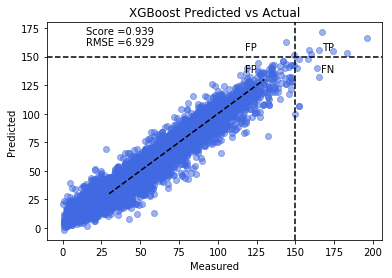

In [15]:
ploter(y_test_1,X_test_1,O3_1,model_1)

In [365]:
# and later you can load it
model_1 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_1hora.pkl')

In [366]:
model_1.predict(X_1)

array([13.143664, 15.066901, 12.2344  , ..., 67.21526 , 61.921295,
       52.403202], dtype=float32)

In [368]:
O3_forecast_1 = model_1.predict(X_1)

# HORA 2

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [71]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [72]:
hora = 2

In [73]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [74]:
X_2 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_2 = dataset[str('O3forecast_'+str(hora))]

In [75]:
X_2.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_2.drop(lista[:hora-1],axis=1,inplace=True)

In [76]:
X_2["O3_forecast_1"] = model_1.predict(X_2)

In [77]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [78]:
model_2_q = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)#,n_estimators=1000)

In [79]:
model_2_q.fit(X_train_2, y_train_2)

      Iter       Train Loss   Remaining Time 
         1           3.6451            6.55m
         2           3.6159            6.51m
         3           3.5890            6.43m
         4           3.5628            6.07m
         5           3.5359            5.82m
         6           3.5093            5.56m
         7           3.4833            5.37m
         8           3.4590            5.22m
         9           3.4339            5.10m
        10           3.4087            5.07m
        20           3.1747            5.01m
        30           2.9735            4.94m
        40           2.8005            4.87m
        50           2.6495            4.79m
        60           2.5086            4.71m
        70           2.3909            4.66m
        80           2.2781            4.64m
        90           2.1739            4.62m
       100           2.0801            4.61m
       200           1.4875            4.37m
       300           1.1805            3.99m
       40

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [84]:
O3_2_q = model_2_q.predict(X_test_2)

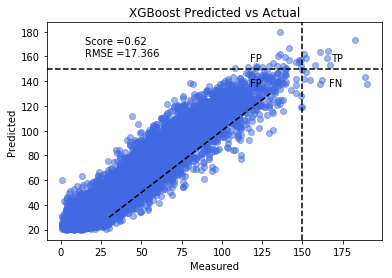

In [85]:
ploter(y_test_2,X_test_2,O3_2_q,model_2_q)

In [87]:
# and later you can load it
model_2_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_2hora_quantile.pkl')

## modelo normal

In [88]:
model_2 = XGBRegressor(learning_rate=0.05,n_estimators=1000,n_jobs=64,random_state=123)

In [89]:
model_2.fit(X_train_2, y_train_2)


/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [90]:
O3_2 = model_2.predict(X_test_2)

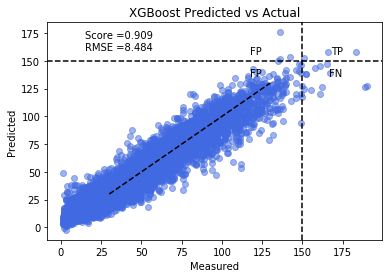

In [91]:
ploter(y_test_2,X_test_2,O3_2,model_2)

In [93]:
# and later you can load it
model_2 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_2hora.pkl')

## Hacemos una función para obtenner el -promedio- de los dos modelos

In [94]:
def predictor_mean(model0_1,modelo_2,X_set):  
    #aplicamos los predict
    forecast_q = model0_1.predict(X_set) 
    forecast = modelo_2.predict(X_set)
   #generamos una lista dummy: 
    forecast_mean = forecast 
    
    for i in range(len(X_set)):
        if  forecast[i] < 135:
            forecast_mean[i] = forecast[i]
        elif  forecast_q[i] > 160:
            forecast_mean[i] = forecast_q[i]
        if  130 < forecast_q[i] <155 and 130 < forecast[i] < 155:
            forecast_mean[i] = (0.3*forecast_q[i] + 0.7*forecast[i])
        if  140 < forecast_q[i] <160 and 140 < forecast[i] < 160:
            forecast_mean[i] = (forecast_q[i] + forecast[i])/2
    return forecast_mean

In [95]:
predict_mean = predictor_mean(model_2_q,model_2,X_test_2)

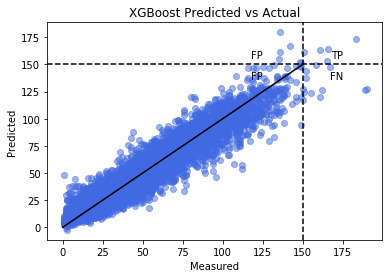

In [96]:
plt.scatter(y_test_2, predict_mean, alpha=0.5,color="royalblue")
plt.axhline(y=150, color='k', linestyle='--')
plt.axvline(x=150, color='k', linestyle='--')
plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
              horizontalalignment='right')

plt.plot( [0,150],[0,150],color="k")
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('XGBoost Predicted vs Actual')
plt.show()

# HORA 3

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [97]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [98]:
hora = 3

In [100]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [101]:
X_3 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_3 = dataset[str('O3forecast_'+str(hora))]

In [102]:
X_3.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_3.drop(lista[:hora-1],axis=1,inplace=True)

In [103]:
X_3["O3_forecast_1"] = model_1.predict(X_3)
X_3["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_3)

In [104]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=123)

## Quantile 95

In [105]:
model_3_q = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)#,n_estimators=1000

In [106]:
model_3_q.fit(X_train_3, y_train_3)

      Iter       Train Loss   Remaining Time 
         1           3.6503            5.16m
         2           3.6207            5.16m
         3           3.5920            5.15m
         4           3.5634            5.14m
         5           3.5352            5.13m
         6           3.5074            5.11m
         7           3.4799            5.09m
         8           3.4531            5.09m
         9           3.4268            5.09m
        10           3.4008            5.08m
        20           3.1616            5.01m
        30           2.9610            4.94m
        40           2.7955            4.77m
        50           2.6438            4.72m
        60           2.5125            4.69m
        70           2.3871            4.67m
        80           2.2744            4.65m
        90           2.1741            4.64m
       100           2.0834            4.60m
       200           1.4971            4.35m
       300           1.2106            3.98m
       40

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [107]:
O3_3_q = model_3_q.predict(X_test_3)

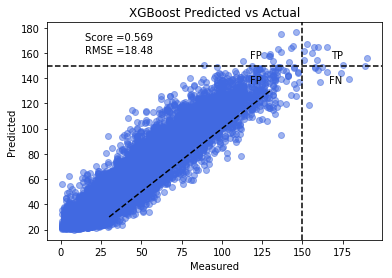

In [108]:
ploter(y_test_3,X_test_3,O3_3_q,model_3_q)

In [110]:
# and later you can load it
model_3_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_3hora_quantile.pkl')

## Modelo Normal

In [111]:
model_3 = XGBRegressor(learning_rate=0.05,n_estimators=1000,n_jobs=64,random_state=123)

In [112]:
model_3.fit(X_train_3, y_train_3)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [113]:
O3_3 = model_3.predict(X_test_3)

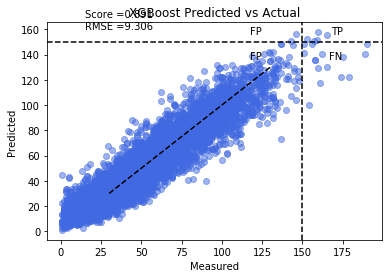

In [114]:
ploter(y_test_3,X_test_3,O3_3,model_3)

In [116]:
# and later you can load it
model_3 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_3hora.pkl')

# HORA 4

In [282]:
hora = 4

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [283]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [284]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [285]:
X_4 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_4 = dataset[str('O3forecast_'+str(hora))]

In [286]:
X_4.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_4.drop(lista[:hora-1],axis=1,inplace=True)

In [287]:
X_4["O3_forecast_1"] = model_1.predict(X_4)
X_4["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_4)
X_4["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_4)

In [288]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.2, random_state=123)

## Quantile 95

In [289]:
model_4_q = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.1,loss="quantile",alpha=0.97,verbose=1,random_state=123)#,n_estimators=1000

In [290]:
model_4_q.fit(X_train_4, y_train_4)

      Iter       Train Loss   Remaining Time 
         1           2.2863            5.65m
         2           2.1591            5.73m
         3           2.0403            5.78m
         4           1.9210            5.83m
         5           1.8171            5.85m
         6           1.7428            5.88m
         7           1.6670            5.93m
         8           1.5962            6.00m
         9           1.5344            6.02m
        10           1.4721            6.05m
        20           1.0505            6.36m
        30           0.8592            6.61m
        40           0.7712            6.57m
        50           0.7305            6.51m
        60           0.7118            6.35m
        70           0.7071            6.01m
        80           0.7035            5.67m
        90           0.6994            5.43m
       100           0.6967            5.23m
       200           0.6887            4.09m
       300           0.6887            3.43m
       40

GradientBoostingRegressor(alpha=0.97, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [291]:
O3_4_q = model_4_q.predict(X_test_4)

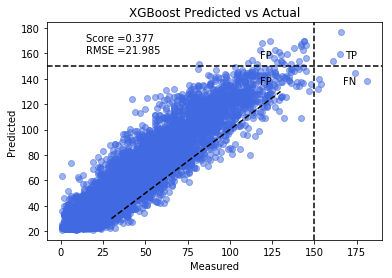

In [292]:
ploter(y_test_4,X_test_4,O3_4_q,model_4_q)

In [294]:
# and later you can load it
model_4_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_4hora_quantile.pkl')

## Modelo Normal

In [295]:
model_4 = XGBRegressor(learning_rate=0.05,n_estimators=1000,n_jobs=64,random_state=123)

In [296]:
model_4.fit(X_train_4, y_train_4)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [297]:
O3_4 = model_4.predict(X_test_4)

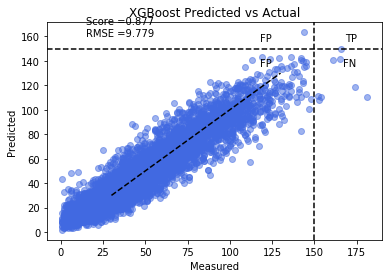

In [298]:
ploter(y_test_4,X_test_4,O3_4,model_4)

In [300]:
# and later you can load it
model_4 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_4hora.pkl')

# HORA 5

In [42]:
hora = 5

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [43]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [44]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [45]:
X_5 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_5 = dataset[str('O3forecast_'+str(hora))]

In [46]:
X_5.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_5.drop(lista[:hora-1],axis=1,inplace=True)

In [47]:
X_5["O3_forecast_1"] = model_1.predict(X_5)
X_5["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_5)
X_5["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_5)
X_5["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_5)

In [48]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.2, random_state=123)

## Quantile 95

In [49]:
model_5_q = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)#,n_estimators=1000

In [50]:
model_5_q.fit(X_train_5, y_train_5)

      Iter       Train Loss   Remaining Time 
         1           3.6474            6.15m
         2           3.6194            6.14m
         3           3.5917            6.14m
         4           3.5643            6.17m
         5           3.5372            6.17m
         6           3.5107            6.19m
         7           3.4844            6.21m
         8           3.4588            6.20m
         9           3.4335            6.21m
        10           3.4083            6.21m
        20           3.1695            5.94m
        30           2.9635            5.89m
        40           2.7931            5.88m
        50           2.6458            5.85m
        60           2.5082            5.80m
        70           2.3878            5.72m
        80           2.2726            5.71m
        90           2.1690            5.69m
       100           2.0736            5.67m
       200           1.4773            5.35m
       300           1.2084            4.86m
       40

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [51]:
O3_5_q = model_5_q.predict(X_test_5)

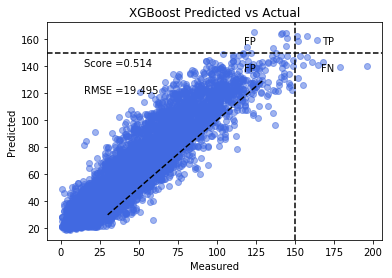

In [52]:
ploter(y_test_5,X_test_5,O3_5_q,model_5_q)

In [54]:
# and later you can load it
model_5_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_5hora_quantile.pkl')

## Modelo Normal

In [55]:
model_5 = XGBRegressor(learning_rate=0.05,n_estimators=1000,n_jobs=64,random_state=123)

In [56]:
model_5.fit(X_train_5, y_train_5)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [57]:
O3_5 = model_5.predict(X_test_5)

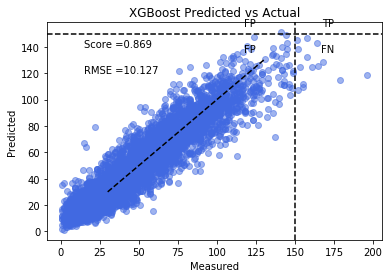

In [58]:
ploter(y_test_5,X_test_5,O3_5,model_5)

In [60]:
# and later you can load it
model_5 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_5hora.pkl')

# HORA 6

In [61]:
hora = 6

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [62]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [63]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [64]:
X_6 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_6 = dataset[str('O3forecast_'+str(hora))]

In [65]:
X_6.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_6.drop(lista[:hora-1],axis=1,inplace=True)

In [66]:
X_6["O3_forecast_1"] = model_1.predict(X_6)
X_6["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_6)
X_6["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_6)
X_6["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_6)
X_6["O3_forecast_5"]  = predictor_mean(model_5_q,model_5,X_6)

In [67]:
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y_6, test_size=0.2, random_state=123)

## Quantile 95

In [68]:
model_6_q = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.05,loss="quantile",alpha=0.96,verbose=1,random_state=123)#,n_estimators=1000

In [69]:
model_6_q.fit(X_train_6, y_train_6)

      Iter       Train Loss   Remaining Time 
         1           2.9683            6.01m
         2           2.8614            5.80m
         3           2.7614            5.63m
         4           2.6745            5.52m
         5           2.5982            5.43m
         6           2.5338            5.46m
         7           2.4555            5.60m
         8           2.3803            5.68m
         9           2.3205            5.72m
        10           2.2577            5.77m
        20           1.8022            5.95m
        30           1.4963            6.15m
        40           1.2934            6.38m
        50           1.1495            6.43m
        60           1.0601            6.52m
        70           1.0032            6.51m
        80           0.9691            6.43m
        90           0.9474            6.29m
       100           0.9267            6.23m
       200           0.8778            4.91m
       300           0.8766            3.96m
       40

GradientBoostingRegressor(alpha=0.96, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [70]:
O3_6_q = model_6_q.predict(X_test_6)

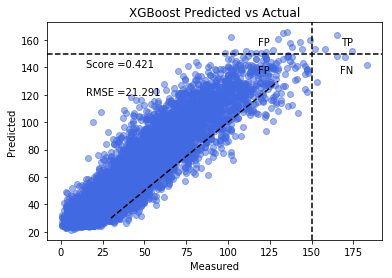

In [71]:
ploter(y_test_6,X_test_6,O3_6_q,model_6_q)

In [73]:
# and later you can load it
O3_6_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_6hora_quantile.pkl')

## Modelo Normal

In [120]:
model_6 = XGBRegressor(learning_rate=0.01,n_estimators=1000,n_jobs=64,random_state=123)

In [121]:
model_6.fit(X_train_6, y_train_6)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [122]:
O3_6 = model_6.predict(X_test_6)

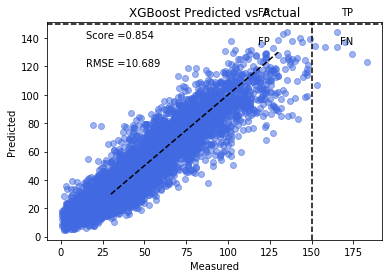

In [123]:
ploter(y_test_6,X_test_6,O3_6,model_6)

In [125]:
# and later you can load it
model_6 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_6hora.pkl')

# HORA 7

In [128]:
hora = 7

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [129]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [130]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [131]:
X_7 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_7 = dataset[str('O3forecast_'+str(hora))]

In [132]:
X_7.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_7.drop(lista[:hora-1],axis=1,inplace=True)

In [133]:
X_7["O3_forecast_1"] = model_1.predict(X_7)
X_7["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_7)
X_7["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_7)
X_7["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_7)
X_7["O3_forecast_5"]  = predictor_mean(model_5_q,model_5,X_7)
X_7["O3_forecast_6"]  = predictor_mean(model_6_q,model_6,X_7)

In [134]:
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_7, y_7, test_size=0.2, random_state=123)

## Quantile 95

In [81]:
model_7_q = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.3,loss="quantile",alpha=0.97,verbose=1,random_state=123)#,n_estimators=1000

In [82]:
model_7_q.fit(X_train_7, y_train_7)

      Iter       Train Loss   Remaining Time 
         1           2.0444            5.78m
         2           1.7716            5.95m
         3           1.5265            6.11m
         4           1.3796            6.24m
         5           1.2423            6.48m
         6           1.1435            6.58m
         7           1.0616            6.71m
         8           1.0136            6.77m
         9           0.9523            6.85m
        10           0.9174            6.90m
        20           0.7822            6.65m
        30           0.7744            5.96m
        40           0.7744            5.56m
        50           0.7744            5.28m
        60           0.7744            5.08m
        70           0.7744            4.92m
        80           0.7744            4.74m
        90           0.7744            4.63m
       100           0.7744            4.53m
       200           0.7744            3.82m
       300           0.7744            3.29m
       40

GradientBoostingRegressor(alpha=0.97, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [83]:
O3_7_q = model_7_q.predict(X_test_7)

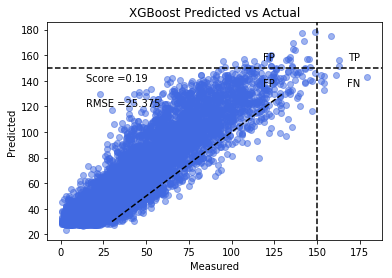

In [84]:
ploter(y_test_7,X_test_7,O3_7_q,model_7_q)

In [86]:
# and later you can load it
O3_7_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_7hora_quantile.pkl')

## Modelo Normal

In [135]:
model_7 = XGBRegressor(learning_rate=0.01,n_estimators=1000,n_jobs=64,random_state=123)

In [136]:
model_7.fit(X_train_7, y_train_7)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [138]:
O3_7 = model_7.predict(X_test_7)

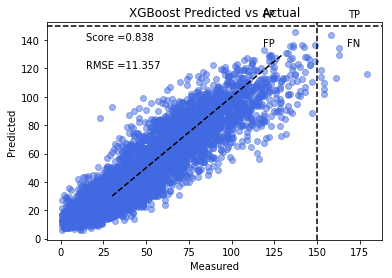

In [139]:
ploter(y_test_7,X_test_7,O3_7,model_7)

In [141]:
# and later you can load it
model_7 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_7hora.pkl')

# HORA 8

In [103]:
hora = 8

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [96]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [97]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [98]:
X_8 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_8 = dataset[str('O3forecast_'+str(hora))]

In [99]:
X_8.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_8.drop(lista[:hora-1],axis=1,inplace=True)

In [100]:
X_8["O3_forecast_1"] = model_1.predict(X_8)
X_8["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_8)
X_8["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_8)
X_8["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_8)
X_8["O3_forecast_5"]  = predictor_mean(model_5_q,model_5,X_8)
X_8["O3_forecast_6"]  = predictor_mean(model_6_q,model_6,X_8)
X_8["O3_forecast_7"]  = predictor_mean(model_7_q,model_7,X_8)

In [102]:
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X_8, y_8, test_size=0.2, random_state=123)

## Quantile 95

In [112]:
model_8_q = GradientBoostingRegressor(n_estimators=400,learning_rate=0.01,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000

In [113]:
model_8_q.fit(X_train_8, y_train_8)

      Iter       Train Loss   Remaining Time 
         1           6.0743            2.64m
         2           6.0231            2.63m
         3           5.9721            2.63m
         4           5.9234            2.62m
         5           5.8748            2.61m
         6           5.8268            2.61m
         7           5.7789            2.61m
         8           5.7316            2.56m
         9           5.6850            2.52m
        10           5.6400            2.48m
        20           5.2252            2.44m
        30           4.8640            2.41m
        40           4.5522            2.38m
        50           4.2799            2.33m
        60           4.0455            2.26m
        70           3.8341            2.21m
        80           3.6526            2.16m
        90           3.4868            2.10m
       100           3.3418            2.03m
       200           2.4430            1.43m
       300           2.1094           44.15s
       40

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=400,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [114]:
O3_8_q = model_8_q.predict(X_test_8)

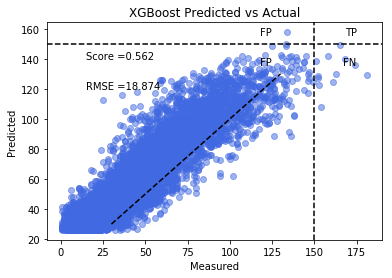

In [115]:
ploter(y_test_8,X_test_8,O3_8_q,model_8_q)

In [116]:
# now you can save it to a file
joblib.dump(model_8_q, '/home/paw/DanielBustillos/Notebooks/Modelos/O3_8hora_quantile.pkl') 

['/home/paw/DanielBustillos/Notebooks/Modelos/O3_8hora_quantile.pkl']

In [117]:
# and later you can load it
O3_8_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_8hora_quantile.pkl')

## Modelo Normal

In [119]:
model_8 = XGBRegressor(learning_rate=0.01,n_estimators=1000,n_jobs=64,random_state=123)

In [120]:
model_8.fit(X_train_8, y_train_8)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [121]:
O3_8 = model_8.predict(X_test_8)

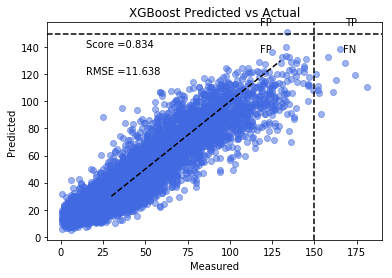

In [122]:
ploter(y_test_8,X_test_8,O3_8,model_8)

In [187]:
# and later you can load it
model_8 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_8hora.pkl')

# HORA 9

In [142]:
hora = 9

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [143]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [144]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [145]:
X_9 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_9 = dataset[str('O3forecast_'+str(hora))]

In [146]:
X_9.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_9.drop(lista[:hora-1],axis=1,inplace=True)

In [147]:
X_9["O3_forecast_1"] = model_1.predict(X_9)
X_9["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_9)
X_9["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_9)
X_9["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_9)
X_9["O3_forecast_5"]  = predictor_mean(model_5_q,model_5,X_9)
X_9["O3_forecast_6"]  = predictor_mean(model_6_q,model_6,X_9)
X_9["O3_forecast_7"]  = predictor_mean(model_7_q,model_7,X_9)
X_9["O3_forecast_8"]  = predictor_mean(model_8_q,model_8,X_9)

In [148]:
X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X_9, y_9, test_size=0.2, random_state=123)

## Quantile 95

In [176]:
model_9_q = GradientBoostingRegressor(n_estimators=700,learning_rate=0.05,loss="quantile",alpha=0.93,verbose=1,random_state=123)#,n_estimators=1000

In [177]:
model_9_q.fit(X_train_9, y_train_9)

      Iter       Train Loss   Remaining Time 
         1           4.5507            3.88m
         2           4.3791            3.87m
         3           4.2217            3.92m
         4           4.0736            4.07m
         5           3.9436            4.18m
         6           3.8075            4.25m
         7           3.6841            4.30m
         8           3.5675            4.33m
         9           3.4650            4.36m
        10           3.3750            4.38m
        20           2.6517            4.54m
        30           2.2336            4.66m
        40           1.9676            4.72m
        50           1.7946            4.69m
        60           1.6808            4.68m
        70           1.6108            4.64m
        80           1.5654            4.56m
        90           1.5356            4.47m
       100           1.5184            4.34m
       200           1.4572            3.18m
       300           1.4525            2.33m
       40

GradientBoostingRegressor(alpha=0.93, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=700,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [178]:
O3_9_q = model_9_q.predict(X_test_9)

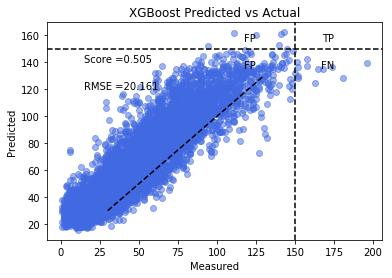

In [179]:
ploter(y_test_9,X_test_9,O3_9_q,model_9_q)

In [181]:
# and later you can load it
O3_9_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_9hora_quantile.pkl')

## Modelo Normal

In [184]:
model_9 = XGBRegressor(learning_rate=0.01,n_estimators=1000,n_jobs=64,random_state=123)

In [185]:
model_9.fit(X_train_9, y_train_9)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [192]:
O3_9 = model_9.predict(X_test_9)

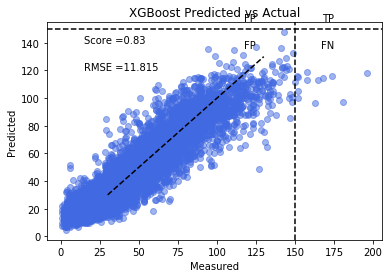

In [193]:
ploter(y_test_9,X_test_9,O3_9,model_9)

In [191]:
# and later you can load it
model_9 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_9hora.pkl')

# HORA 10

In [194]:
hora = 10

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [198]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [199]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [200]:
X_10 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_10 = dataset[str('O3forecast_'+str(hora))]

In [201]:
X_10.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_10.drop(lista[:hora-1],axis=1,inplace=True)

In [202]:
X_10["O3_forecast_1"] = model_1.predict(X_10)
X_10["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_10)
X_10["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_10)
X_10["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_10)
X_10["O3_forecast_5"]  = predictor_mean(model_5_q,model_5,X_10)
X_10["O3_forecast_6"]  = predictor_mean(model_6_q,model_6,X_10)
X_10["O3_forecast_7"]  = predictor_mean(model_7_q,model_7,X_10)
X_10["O3_forecast_8"]  = predictor_mean(model_8_q,model_8,X_10)
X_10["O3_forecast_9"]  = predictor_mean(model_9_q,model_9,X_10)

In [203]:
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y_10, test_size=0.2, random_state=123)

## Quantile 95

In [234]:
model_10_q = GradientBoostingRegressor(n_estimators=300,learning_rate=0.5 ,loss="quantile",alpha=0.97,verbose=1,random_state=123)#,n_estimators=1000

In [235]:
model_10_q.fit(X_train_10, y_train_10)

      Iter       Train Loss   Remaining Time 
         1           1.8433            2.34m
         2           1.4348            2.50m
         3           1.2392            2.63m
         4           1.1079            2.65m
         5           1.0088            2.66m
         6           0.9726            2.62m
         7           0.9327            2.55m
         8           0.9028            2.48m
         9           0.8830            2.41m
        10           0.8694            2.34m
        20           0.8384            1.83m
        30           0.8384            1.61m
        40           0.8384            1.48m
        50           0.8384            1.38m
        60           0.8348            1.29m
        70           0.8305            1.22m
        80           0.8305            1.14m
        90           0.8305            1.08m
       100           0.8285            1.03m
       200           0.8092           29.71s
       300           0.8074            0.00s


GradientBoostingRegressor(alpha=0.97, criterion='friedman_mse', init=None,
             learning_rate=0.5, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=300,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [236]:
O3_10_q = model_10_q.predict(X_test_10)

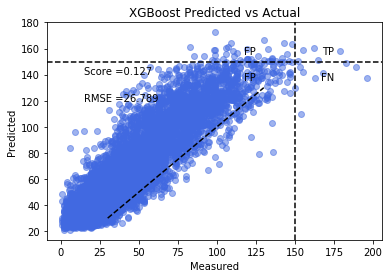

In [237]:
ploter(y_test_10,X_test_10,O3_10_q,model_10_q)

In [239]:
# and later you can load it
O3_10_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_10hora_quantile.pkl')

## Modelo Normal

In [246]:
model_10 = XGBRegressor(learning_rate=0.1,n_estimators=300,n_jobs=64,random_state=123)

In [247]:
model_10.fit(X_train_10, y_train_10)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [248]:
O3_10 = model_10.predict(X_test_10)

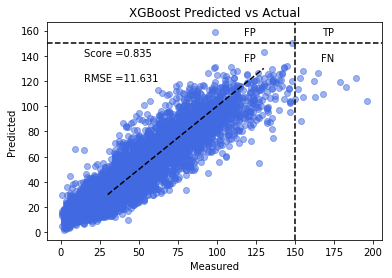

In [249]:
ploter(y_test_10,X_test_10,O3_10,model_10)

In [339]:
# and later you can load it
model_10 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_10hora.pkl')

# HORA 11

In [333]:
hora = 11

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [334]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [335]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [336]:
X_11 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_11 = dataset[str('O3forecast_'+str(hora))]

In [337]:
X_11.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_11.drop(lista[:hora-1],axis=1,inplace=True)

In [338]:
X_11["O3_forecast_1"] = model_1.predict(X_11)
X_11["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_11)
X_11["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_11)
X_11["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_11)
X_11["O3_forecast_5"]  = predictor_mean(model_5_q,model_5,X_11)
X_11["O3_forecast_6"]  = predictor_mean(model_6_q,model_6,X_11)
X_11["O3_forecast_7"]  = predictor_mean(model_7_q,model_7,X_11)
X_11["O3_forecast_8"]  = predictor_mean(model_8_q,model_8,X_11)
X_11["O3_forecast_9"]  = predictor_mean(model_9_q,model_9,X_11)
X_11["O3_forecast_10"]  = predictor_mean(model_10_q,model_10,X_11)

In [265]:
X_train_11, X_test_11, y_train_11, y_test_11 = train_test_split(X_11, y_11, test_size=0.2, random_state=123)

## Quantile 95

In [301]:
model_11_q = GradientBoostingRegressor(n_estimators=500,learning_rate=0.1 ,loss="quantile",alpha=0.95,verbose=1,random_state=123)#,n_estimators=1000

In [302]:
model_11_q.fit(X_train_11, y_train_11)

      Iter       Train Loss   Remaining Time 
         1           3.3909            3.56m
         2           3.1479            3.57m
         3           2.9432            3.43m
         4           2.7682            3.23m
         5           2.6118            3.13m
         6           2.4765            3.06m
         7           2.3556            3.06m
         8           2.2545            3.06m
         9           2.1646            3.09m
        10           2.0759            3.12m
        20           1.5363            3.33m
        30           1.3112            3.39m
        40           1.2182            3.35m
        50           1.1756            3.23m
        60           1.1527            3.09m
        70           1.1430            2.94m
        80           1.1403            2.77m
        90           1.1378            2.62m
       100           1.1358            2.48m
       200           1.1350            1.65m
       300           1.1350            1.05m
       40

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [303]:
O3_11_q = model_11_q.predict(X_test_11)

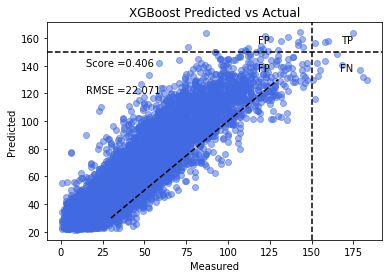

In [304]:
ploter(y_test_11,X_test_11,O3_11_q,model_11_q)

In [340]:
# and later you can load it
O3_11_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_11hora_quantile.pkl')

## Modelo Normal

In [315]:
model_11 = GradientBoostingRegressor(n_estimators=100,learning_rate=0.01,verbose=1,random_state=123)#,n_estimators=1000

In [319]:
model_11 = XGBRegressor(learning_rate=0.1,n_estimators=300,n_jobs=64,random_state=123)

In [320]:
model_11.fit(X_train_11, y_train_11)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [321]:
O3_11 = model_11.predict(X_test_11)

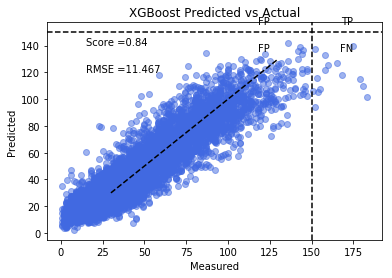

In [401]:
ploter(y_test_11,X_test_11,O3_11,model_11)

In [324]:
# and later you can load it
model_11 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_11hora.pkl')

# HORA 12

In [595]:
hora = 12

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [596]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [597]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [598]:
X_12 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_12 = dataset[str('O3forecast_'+str(hora))]

In [599]:
X_12.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_12.drop(lista[:hora-1],axis=1,inplace=True)

In [600]:
X_12["O3_forecast_1"] = model_1.predict(X_12)
X_12["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_12)
X_12["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_12)
X_12["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_12)
X_12["O3_forecast_5"]  = predictor_mean(model_5_q,model_5,X_12)
X_12["O3_forecast_6"]  = predictor_mean(model_6_q,model_6,X_12)
X_12["O3_forecast_7"]  = predictor_mean(model_7_q,model_7,X_12)
X_12["O3_forecast_8"]  = predictor_mean(model_8_q,model_8,X_12)
X_12["O3_forecast_9"]  = predictor_mean(model_9_q,model_9,X_12)
X_12["O3_forecast_10"]  = predictor_mean(model_10_q,model_10,X_12)
X_12["O3_forecast_11"]  = predictor_mean(model_11_q,model_11,X_12)

In [363]:
X_train_12, X_test_12, y_train_12, y_test_12 = train_test_split(X_12, y_12, test_size=0.2, random_state=123)

## Quantile 95

In [390]:
model_12_q = GradientBoostingRegressor(n_estimators=50,learning_rate=0.5 ,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000

In [391]:
model_12_q.fit(X_train_12, y_train_12)

      Iter       Train Loss   Remaining Time 
         1           3.9661           17.13s
         2           3.0967           17.82s
         3           2.6003           19.06s
         4           2.3013           19.30s
         5           2.1707           19.64s
         6           2.1028           19.67s
         7           2.0610           18.93s
         8           2.0258           18.76s
         9           2.0085           17.99s
        10           2.0008           17.11s
        20           1.9177           12.39s
        30           1.8613            8.15s
        40           1.8484            3.88s
        50           1.8468            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.5, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, presort='auto',
             random_state=123, subsample=1.0, verbose=1, warm_start=False)

In [392]:
O3_12_q = model_12_q.predict(X_test_12)

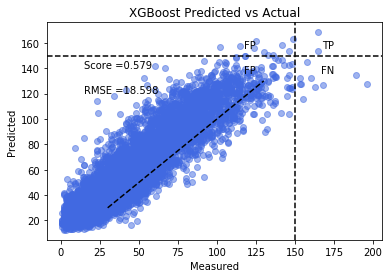

In [393]:
ploter(y_test_12,X_test_12,O3_12_q,model_12_q)

In [396]:
# and later you can load it
O3_12_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_12hora_quantile.pkl')

## Modelo Normal

In [406]:
model_12 = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,verbose=1,random_state=123)#,n_estimators=1000

In [410]:
model_12 = XGBRegressor(learning_rate=0.1,n_estimators=300,n_jobs=64,random_state=123)

In [411]:
model_12.fit(X_train_12, y_train_12)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [412]:
O3_12 = model_12.predict(X_test_12)

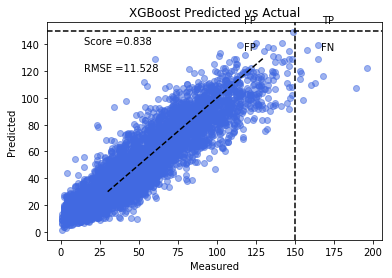

In [413]:
ploter(y_test_12,X_test_12,O3_12,model_12)

In [415]:
# and later you can load it
model_12 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_12hora.pkl')

# HORA 13

# data_hour_merge_14

In [694]:
hora = 13

In [695]:
lista1 = ['O3forecast_24','O3forecast_23','O3forecast_22','O3forecast_21','O3forecast_20','O3forecast_19',
         'O3forecast_18','O3forecast_17','O3forecast_16','O3forecast_15','O3forecast_14',
         'O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista1 = lista[::-1]
lista1 = lista

In [696]:
dataset_mas = data_hour_merge_14.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset_mas.dropna(inplace=True)

In [697]:
X_13 = dataset_mas.loc[:, dataset_mas.columns != str('O3forecast_'+str(hora))]
y_13 = dataset_mas[str('O3forecast_'+str(hora))]

In [698]:
X_13.drop(lista1[hora:],axis=1,inplace=True)
#if hora != 1:
 #   X_13.drop(lista1[:hora-1],axis=1,inplace=True)

In [699]:
X_train_13, X_test_13, y_train_13, y_test_13 = train_test_split(X_13, y_13, test_size=0.2, random_state=123)

## Quantile 95

In [150]:
model_13_q = GradientBoostingRegressor(n_estimators=30,learning_rate=0.5 
                                       ,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000

In [151]:
model_13_q.fit(X_train_13, y_train_13)

      Iter       Train Loss   Remaining Time 
         1           3.8692           13.85s
         2           2.9664           13.42s
         3           2.4163           13.37s
         4           2.0525           13.15s
         5           1.8411           12.97s
         6           1.7092           12.33s
         7           1.6179           11.61s
         8           1.5753           11.23s
         9           1.5404           10.65s
        10           1.5183           10.16s
        20           1.4293            4.91s
        30           1.3706            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.5, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=30, presort='auto',
             random_state=123, subsample=1.0, verbose=1, warm_start=False)

In [700]:
O3_13_q = model_13_q.predict(X_test_13)

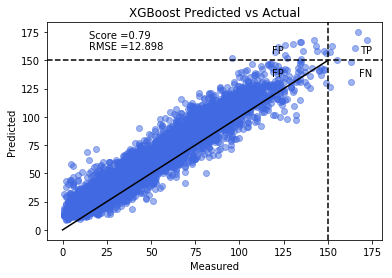

In [153]:
ploter(y_test_13,X_test_13,O3_13_q,model_13_q)

In [587]:
# and later you can load it
model_13_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_13hora_quantile.pkl')

## Modelo Normal

In [157]:
model_13 = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,verbose=1,random_state=123)#,n_estimators=1000

In [158]:
model_13 = XGBRegressor(learning_rate=0.1,n_estimators=300,n_jobs=64,random_state=123)

In [159]:
model_13.fit(X_train_13, y_train_13)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [160]:
O3_13 = model_13.predict(X_test_13)

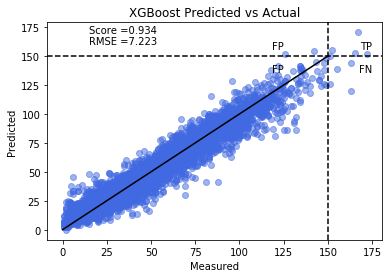

In [161]:
ploter(y_test_13,X_test_13,O3_13,model_13)

In [164]:
# and later you can load it
model_13 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_13hora.pkl')

# HORA 14

# data_hour_merge_14

In [701]:
hora = 14

In [702]:
lista1 = ['O3forecast_24','O3forecast_23','O3forecast_22','O3forecast_21','O3forecast_20','O3forecast_19',
         'O3forecast_18','O3forecast_17','O3forecast_16','O3forecast_15','O3forecast_14',
         'O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista1 = lista[::-1]
lista1 = lista

In [703]:
dataset_mas = data_hour_merge_14.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset_mas.dropna(inplace=True)

In [704]:
X_14 = dataset_mas.loc[:, dataset_mas.columns != str('O3forecast_'+str(hora))]
y_14 = dataset_mas[str('O3forecast_'+str(hora))]

In [705]:
X_14.drop(lista1[hora:],axis=1,inplace=True)
if hora != 1:
    X_14.drop("O3forecast_13",axis=1,inplace=True)

In [706]:
X_14["O3_forecast_13"] = predictor_mean(model_13_q,model_13,X_14)

In [707]:
X_14.columns.tolist()

['PM10_1_x1',
 'TMP_1_x',
 'PM1_min_2',
 'O3forecast_2',
 'CO_1_y',
 'RHforecast_3',
 'hora_x',
 'WSP6_x',
 'SO2_30_x',
 'NO_x',
 'WSP1_x',
 'RH_24_y',
 'PM1_min_1',
 'WSP2_y',
 'TMP_47',
 'SO2_24',
 'temp_1',
 'O3_4',
 'TMPforecast_3',
 'PM10_1_y',
 'PM1_1',
 'RHforecast_11',
 'temp_1_x',
 'TMP_2_y',
 'RHforecast_4',
 'SO2_y',
 'WSP11',
 'WSPforecast_12',
 'O3_2_y',
 'RH_2',
 'WSP4_x',
 'SO2_1_x',
 'O3_22_y',
 'RHforecast_12',
 'WSPforecast_11',
 'PM10_x',
 'O3_y',
 'RHforecast_1',
 'TMP_1',
 'RH_24_2_x',
 'WSP10_y',
 'SO2_24_x',
 'SO2_2_y',
 'RH_x',
 'RH_2_x',
 'WSP12_y',
 'PM10_3_a_x',
 'O3_24',
 'PM10_max_1',
 'TMP_3_y',
 'PM10_max_3',
 'RH_3',
 'PM10_1_a_x',
 'PMPM10_2_y',
 'O3_35_x',
 'PM10_2',
 'TMPforecast_4',
 'RHforecast_10',
 'O3_3_x',
 'O3_3_y',
 'CO_y',
 'PM1_2',
 'WSP7',
 'O3forecast_3',
 'PM1_min_2_x',
 'CO_x',
 'WSP6_y',
 'NO',
 'RH_34_x',
 'PM1_1_x',
 'WSP5_x',
 'TMP_23_y',
 'WSP5',
 'temp_1_y',
 'temp_24',
 'RH_47_x',
 'RH_47_y',
 'RH_2_y',
 'RH_24_x',
 'O3_1_y',
 'PM

In [201]:
X_train_14, X_test_14, y_train_14, y_test_14 = train_test_split(X_14, y_14, test_size=0.2, random_state=123)

# data_hour_merge_14

## Quantile 95

In [202]:
model_14_q = GradientBoostingRegressor(n_estimators=200,learning_rate=0.5 
                                       ,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000

In [203]:
model_14_q.fit(X_train_14, y_train_14)

      Iter       Train Loss   Remaining Time 
         1           3.8911            1.62m
         2           2.9937            1.62m
         3           2.4298            1.69m
         4           2.1247            1.73m
         5           1.9568            1.74m
         6           1.8664            1.73m
         7           1.8129            1.73m
         8           1.7808            1.69m
         9           1.7606            1.69m
        10           1.7481            1.67m
        20           1.6640            1.47m
        30           1.6279            1.35m
        40           1.5909            1.25m
        50           1.5725            1.15m
        60           1.5709            1.02m
        70           1.5708           55.09s
        80           1.5708           49.51s
        90           1.5707           44.36s
       100           1.5707           39.71s
       200           1.5654            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.5, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [204]:
O3_14_q = model_14_q.predict(X_test_14)

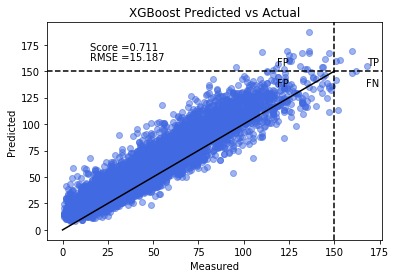

In [205]:
ploter(y_test_14,X_test_14,O3_14_q,model_14_q)

In [357]:
# and later you can load it
O3_14_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_14hora_quantile.pkl')

## Modelo Normal

In [303]:
model_14 = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,verbose=1,random_state=123)#,n_estimators=1000

In [304]:
model_14 = XGBRegressor(learning_rate=0.1,n_estimators=300,n_jobs=64,random_state=123)

In [305]:
model_14.fit(X_train_14, y_train_14)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [306]:
O3_14 = model_14.predict(X_test_14)

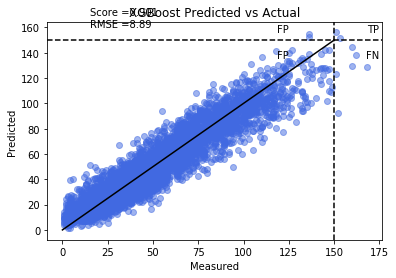

In [307]:
ploter(y_test_14,X_test_14,O3_14,model_14)

In [358]:
# and later you can load it
model_14 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_14hora.pkl')

# HORA 15

In [311]:
hora = 15

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [312]:
lista1 = ['O3forecast_24','O3forecast_23','O3forecast_22','O3forecast_21','O3forecast_20','O3forecast_19',
         'O3forecast_18','O3forecast_17','O3forecast_16','O3forecast_15','O3forecast_14',
         'O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista1 = lista[::-1]
lista1 = lista

In [313]:
dataset_mas = data_hour_merge_14.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset_mas.dropna(inplace=True)

In [314]:
X_15 = dataset_mas.loc[:, dataset_mas.columns != str('O3forecast_'+str(hora))]
y_15 = dataset_mas[str('O3forecast_'+str(hora))]

In [315]:
borrar =["O3forecast_13","O3forecast_14"]

In [316]:
X_15.drop(lista1[hora:],axis=1,inplace=True)
if hora != 1:
    X_15.drop(borrar,axis=1,inplace=True)

In [317]:
X_15["O3_forecast_13"] = predictor_mean(model_13_q,model_13,X_15)
X_15["O3_forecast_14"] = predictor_mean(model_14_q,model_14,X_15)

In [238]:
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(X_15, y_15, test_size=0.2, random_state=123)

## Quantile 95

In [239]:
model_15_q = GradientBoostingRegressor(n_estimators=200,learning_rate=0.1 
                                       ,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000

In [240]:
model_15_q.fit(X_train_15, y_train_15)

      Iter       Train Loss   Remaining Time 
         1           5.6135            1.49m
         2           5.1884            1.43m
         3           4.8197            1.41m
         4           4.4983            1.44m
         5           4.2035            1.47m
         6           3.9521            1.50m
         7           3.7383            1.51m
         8           3.5275            1.53m
         9           3.3541            1.53m
        10           3.2057            1.54m
        20           2.2732            1.56m
        30           1.9296            1.54m
        40           1.8049            1.43m
        50           1.7513            1.33m
        60           1.7216            1.23m
        70           1.7036            1.11m
        80           1.6902            1.01m
        90           1.6796           54.39s
       100           1.6727           48.62s
       200           1.6340            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [241]:
O3_15_q = model_15_q.predict(X_test_15)

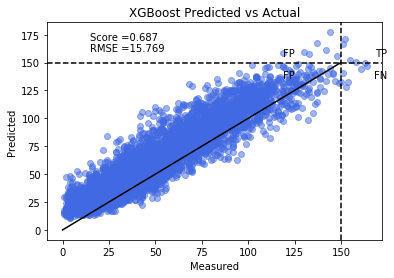

In [242]:
ploter(y_test_15,X_test_15,O3_15_q,model_15_q)

In [326]:
# and later you can load it
O3_15_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_15hora_quantile.pkl')

## Modelo Normal

In [245]:
model_15 = XGBRegressor(learning_rate=0.1,n_estimators=300,n_jobs=64,random_state=123)

In [246]:
model_15.fit(X_train_15, y_train_15)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [247]:
O3_15 = model_15.predict(X_test_15)

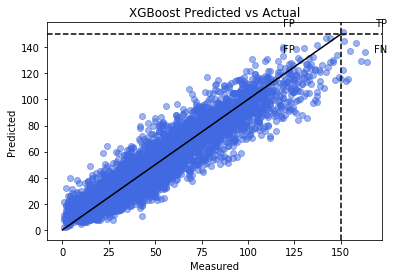

In [248]:
ploter(y_test_15,X_test_15,O3_15,model_15)

In [325]:
# and later you can load it
model_15 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_15hora.pkl')

# HORA 16

In [327]:
hora = 16

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [328]:
lista1 = ['O3forecast_24','O3forecast_23','O3forecast_22','O3forecast_21','O3forecast_20','O3forecast_19',
         'O3forecast_18','O3forecast_17','O3forecast_16','O3forecast_15','O3forecast_14',
         'O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista1 = lista[::-1]
lista1 = lista

In [329]:
dataset_mas = data_hour_merge_14.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset_mas.dropna(inplace=True)

In [330]:
X_16 = dataset_mas.loc[:, dataset_mas.columns != str('O3forecast_'+str(hora))]
y_16 = dataset_mas[str('O3forecast_'+str(hora))]

In [331]:
borrar =["O3forecast_13","O3forecast_14","O3forecast_15"]

In [332]:
X_16.drop(lista1[hora:],axis=1,inplace=True)
if hora != 1:
    X_16.drop(borrar,axis=1,inplace=True)

In [333]:
X_16["O3_forecast_13"] = predictor_mean(model_13_q,model_13,X_16)
X_16["O3_forecast_14"] = predictor_mean(model_14_q,model_14,X_16)
X_16["O3_forecast_15"] = predictor_mean(model_15_q,model_15,X_16)

In [271]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split(X_16, y_16, test_size=0.2, random_state=123)

## Quantile 95

In [272]:
model_16_q = GradientBoostingRegressor(n_estimators=200,learning_rate=0.1 
                                       ,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000

In [273]:
model_16_q.fit(X_train_16, y_train_16)

      Iter       Train Loss   Remaining Time 
         1           5.6072            1.66m
         2           5.1645            1.64m
         3           4.8012            1.62m
         4           4.4856            1.61m
         5           4.2011            1.61m
         6           3.9551            1.61m
         7           3.7282            1.61m
         8           3.5482            1.61m
         9           3.3781            1.59m
        10           3.2327            1.60m
        20           2.3033            1.57m
        30           1.9583            1.54m
        40           1.8315            1.44m
        50           1.7819            1.33m
        60           1.7580            1.23m
        70           1.7391            1.11m
        80           1.7296           59.80s
        90           1.7252           53.30s
       100           1.7169           47.73s
       200           1.6680            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [274]:
O3_16_q = model_16_q.predict(X_test_16)

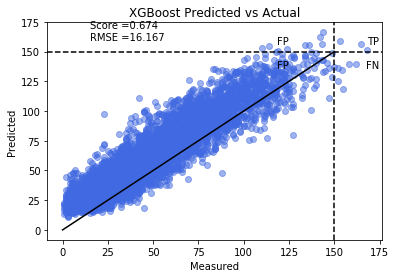

In [275]:
ploter(y_test_16,X_test_16,O3_16_q,model_16_q)

In [360]:
# and later you can load it
O3_16_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_16hora_quantile.pkl')

## Modelo Normal

In [278]:
model_14 = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,verbose=1,random_state=123)#,n_estimators=1000

In [280]:
model_16 = XGBRegressor(learning_rate=0.1,n_estimators=300,n_jobs=64,random_state=123)

In [281]:
model_16.fit(X_train_16, y_train_16)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [282]:
O3_16 = model_16.predict(X_test_16)

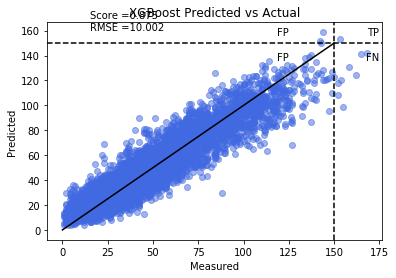

In [283]:
ploter(y_test_16,X_test_16,O3_16,model_16)

In [361]:
# and later you can load it
model_16 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_16hora.pkl')

# HORA 17

In [616]:
hora = 17

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [617]:
lista1 = ['O3forecast_24','O3forecast_23','O3forecast_22','O3forecast_21','O3forecast_20','O3forecast_19',
         'O3forecast_18','O3forecast_17','O3forecast_16','O3forecast_15','O3forecast_14',
         'O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista1 = lista[::-1]
lista1 = lista

In [618]:
dataset_mas = data_hour_merge_14.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset_mas.dropna(inplace=True)

In [619]:
X_16 = dataset_mas.loc[:, dataset_mas.columns != str('O3forecast_'+str(hora))]
y_16 = dataset_mas[str('O3forecast_'+str(hora))]

In [620]:
borrar =["O3forecast_13","O3forecast_14","O3forecast_15","O3forecast_16"]

In [621]:
X_16.drop(lista1[hora:],axis=1,inplace=True)
if hora != 1:
    X_16.drop(borrar,axis=1,inplace=True)

In [622]:
X_16["O3_forecast_13"] = predictor_mean(model_13_q,model_13,X_16)
X_16["O3_forecast_14"] = predictor_mean(model_14_q,model_14,X_16)
X_16["O3_forecast_15"] = predictor_mean(model_15_q,model_15,X_16)
X_16["O3_forecast_16"] = predictor_mean(model_16_q,model_16,X_16)

ValueError: Number of features of the model must match the input. Model n_features is 293 and input n_features is 300 

In [346]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split(X_16, y_16, test_size=0.2, random_state=123)

## Quantile 95

In [347]:
model_17_q = GradientBoostingRegressor(n_estimators=200,learning_rate=0.1 
                                       ,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000

In [348]:
model_17_q.fit(X_train_16, y_train_16)

      Iter       Train Loss   Remaining Time 
         1           5.5974            1.74m
         2           5.1568            1.73m
         3           4.7788            1.72m
         4           4.4573            1.69m
         5           4.1765            1.67m
         6           3.9275            1.66m
         7           3.7030            1.65m
         8           3.5112            1.64m
         9           3.3464            1.63m
        10           3.2049            1.62m
        20           2.2975            1.58m
        30           1.9863            1.55m
        40           1.8665            1.45m
        50           1.8153            1.34m
        60           1.7910            1.23m
        70           1.7736            1.12m
        80           1.7651            1.00m
        90           1.7553           53.96s
       100           1.7468           48.74s
       200           1.7053            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [350]:
O3_17_q = model_17_q.predict(X_test_16)

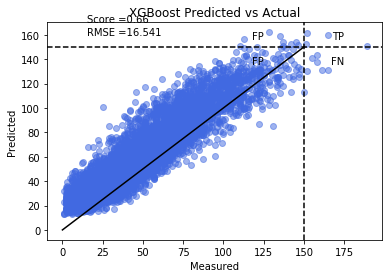

In [351]:
ploter(y_test_16,X_test_16,O3_17_q,model_17_q)

In [354]:
# and later you can load it
O3_17_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_17hora_quantile.pkl')

## Modelo Normal

In [362]:
model_17 = XGBRegressor(learning_rate=0.1,n_estimators=300,n_jobs=64,random_state=123)

In [363]:
model_17.fit(X_train_16, y_train_16)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [365]:
O3_17 = model_17.predict(X_test_16)

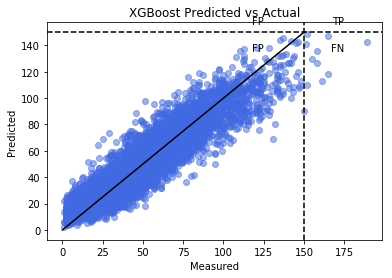

In [366]:
ploter(y_test_16,X_test_16,O3_17,model_17)

In [369]:
# and later you can load it
model_17 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_17hora.pkl')

# HORA 18

In [370]:
hora = 18

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [371]:
lista1 = ['O3forecast_24','O3forecast_23','O3forecast_22','O3forecast_21','O3forecast_20','O3forecast_19',
         'O3forecast_18','O3forecast_17','O3forecast_16','O3forecast_15','O3forecast_14',
         'O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista1 = lista[::-1]
lista1 = lista

In [372]:
dataset_mas = data_hour_merge_14.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset_mas.dropna(inplace=True)

In [373]:
X_16 = dataset_mas.loc[:, dataset_mas.columns != str('O3forecast_'+str(hora))]
y_16 = dataset_mas[str('O3forecast_'+str(hora))]

In [374]:
borrar =["O3forecast_13","O3forecast_14","O3forecast_15","O3forecast_16","O3forecast_17"]

In [375]:
X_16.drop(lista1[hora:],axis=1,inplace=True)
if hora != 1:
    X_16.drop(borrar,axis=1,inplace=True)

In [376]:
X_16["O3_forecast_13"] = predictor_mean(model_13_q,model_13,X_16)
X_16["O3_forecast_14"] = predictor_mean(model_14_q,model_14,X_16)
X_16["O3_forecast_15"] = predictor_mean(model_15_q,model_15,X_16)
X_16["O3_forecast_16"] = predictor_mean(model_16_q,model_16,X_16)
X_16["O3_forecast_17"] = predictor_mean(model_17_q,model_17,X_16)

In [377]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split(X_16, y_16, test_size=0.2, random_state=123)

## Quantile 95

In [378]:
model_18_q = GradientBoostingRegressor(n_estimators=200,learning_rate=0.1 
                                       ,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000

In [379]:
model_18_q.fit(X_train_16, y_train_16)

      Iter       Train Loss   Remaining Time 
         1           5.6173            1.62m
         2           5.1810            1.60m
         3           4.8213            1.61m
         4           4.4845            1.62m
         5           4.1946            1.62m
         6           3.9567            1.63m
         7           3.7427            1.63m
         8           3.5529            1.63m
         9           3.3872            1.62m
        10           3.2418            1.62m
        20           2.3370            1.59m
        30           2.0103            1.57m
        40           1.8925            1.48m
        50           1.8391            1.36m
        60           1.8128            1.25m
        70           1.7937            1.14m
        80           1.7830            1.03m
        90           1.7733           55.51s
       100           1.7679           49.50s
       200           1.7212            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [381]:
O3_18_q = model_18_q.predict(X_test_16)

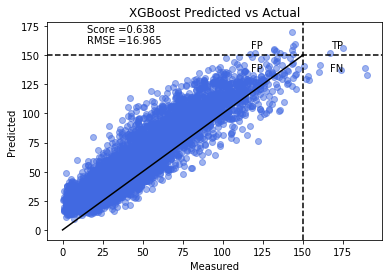

In [382]:
ploter(y_test_16,X_test_16,O3_18_q,model_18_q)

In [384]:
# and later you can load it
O3_18_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_18hora_quantile.pkl')

## Modelo Normal

In [385]:
model_18 = XGBRegressor(learning_rate=0.1,n_estimators=200,n_jobs=64,random_state=123)

In [387]:
model_18.fit(X_train_16, y_train_16)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [389]:
O3_18 = model_18.predict(X_test_16)

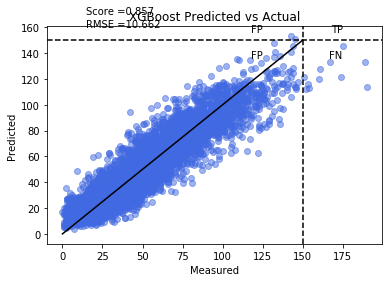

In [390]:
ploter(y_test_16,X_test_16,O3_18,model_18)

In [392]:
# and later you can load it
model_18 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_18hora.pkl')

# HORA 19

In [393]:
hora = 19

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [394]:
lista1 = ['O3forecast_24','O3forecast_23','O3forecast_22','O3forecast_21','O3forecast_20','O3forecast_19',
         'O3forecast_18','O3forecast_17','O3forecast_16','O3forecast_15','O3forecast_14',
         'O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista1 = lista[::-1]
lista1 = lista

In [395]:
dataset_mas = data_hour_merge_14.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset_mas.dropna(inplace=True)

In [396]:
X_16 = dataset_mas.loc[:, dataset_mas.columns != str('O3forecast_'+str(hora))]
y_16 = dataset_mas[str('O3forecast_'+str(hora))]

In [397]:
borrar =["O3forecast_13","O3forecast_14","O3forecast_15","O3forecast_16","O3forecast_17","O3forecast_18"]

In [398]:
X_16.drop(lista1[hora:],axis=1,inplace=True)
if hora != 1:
    X_16.drop(borrar,axis=1,inplace=True)

In [399]:
X_16["O3_forecast_13"] = predictor_mean(model_13_q,model_13,X_16)
X_16["O3_forecast_14"] = predictor_mean(model_14_q,model_14,X_16)
X_16["O3_forecast_15"] = predictor_mean(model_15_q,model_15,X_16)
X_16["O3_forecast_16"] = predictor_mean(model_16_q,model_16,X_16)
X_16["O3_forecast_17"] = predictor_mean(model_17_q,model_17,X_16)
X_16["O3_forecast_18"] = predictor_mean(model_18_q,model_18,X_16)

In [400]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split(X_16, y_16, test_size=0.2, random_state=123)

## Quantile 95

In [401]:
model_19_q = GradientBoostingRegressor(n_estimators=70,learning_rate=0.1 
                                       ,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000

In [402]:
model_19_q.fit(X_train_16, y_train_16)

      Iter       Train Loss   Remaining Time 
         1           5.6358           34.59s
         2           5.1920           34.21s
         3           4.8135           33.01s
         4           4.4943           31.72s
         5           4.2083           30.69s
         6           3.9586           30.55s
         7           3.7430           30.12s
         8           3.5580           29.90s
         9           3.3925           29.79s
        10           3.2485           29.65s
        20           2.3561           26.77s
        30           2.0395           22.18s
        40           1.9284           16.55s
        50           1.8751           10.98s
        60           1.8495            5.40s
        70           1.8318            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=70, presort='auto',
             random_state=123, subsample=1.0, verbose=1, warm_start=False)

In [403]:
O3_19_q = model_19_q.predict(X_test_16)

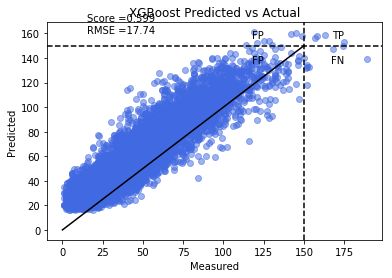

In [404]:
ploter(y_test_16,X_test_16,O3_19_q,model_19_q)

In [407]:
# and later you can load it
O3_19_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_19hora_quantile.pkl')

## Modelo Normal

In [408]:
model_19 = XGBRegressor(learning_rate=0.1,n_estimators=200,n_jobs=64,random_state=123)

In [409]:
model_19.fit(X_train_16, y_train_16)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [410]:
O3_19 = model_19.predict(X_test_16)

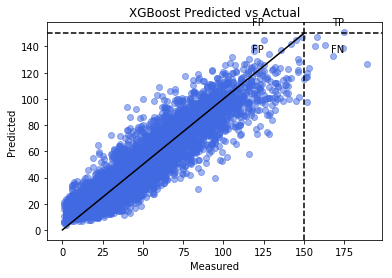

In [411]:
ploter(y_test_16,X_test_16,O3_19,model_19)

In [413]:
# and later you can load it
model_19 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_19hora.pkl')

# HORA 20

In [414]:
hora = 20

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [415]:
lista1 = ['O3forecast_24','O3forecast_23','O3forecast_22','O3forecast_21','O3forecast_20','O3forecast_19',
         'O3forecast_18','O3forecast_17','O3forecast_16','O3forecast_15','O3forecast_14',
         'O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista1 = lista[::-1]
lista1 = lista

In [416]:
dataset_mas = data_hour_merge_14.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset_mas.dropna(inplace=True)

In [417]:
X_16 = dataset_mas.loc[:, dataset_mas.columns != str('O3forecast_'+str(hora))]
y_16 = dataset_mas[str('O3forecast_'+str(hora))]

In [418]:
borrar =["O3forecast_13","O3forecast_14","O3forecast_15","O3forecast_16","O3forecast_17","O3forecast_18",
        "O3forecast_19"]

In [419]:
X_16.drop(lista1[hora:],axis=1,inplace=True)
if hora != 1:
    X_16.drop(borrar,axis=1,inplace=True)

In [420]:
X_16["O3_forecast_13"] = predictor_mean(model_13_q,model_13,X_16)
X_16["O3_forecast_14"] = predictor_mean(model_14_q,model_14,X_16)
X_16["O3_forecast_15"] = predictor_mean(model_15_q,model_15,X_16)
X_16["O3_forecast_16"] = predictor_mean(model_16_q,model_16,X_16)
X_16["O3_forecast_17"] = predictor_mean(model_17_q,model_17,X_16)
X_16["O3_forecast_18"] = predictor_mean(model_18_q,model_18,X_16)
X_16["O3_forecast_19"] = predictor_mean(model_19_q,model_19,X_16)

In [421]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split(X_16, y_16, test_size=0.2, random_state=123)

## Quantile 95

In [423]:
model_20_q = GradientBoostingRegressor(n_estimators=50,learning_rate=0.1 
                                       ,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000

In [424]:
model_20_q.fit(X_train_16, y_train_16)

      Iter       Train Loss   Remaining Time 
         1           5.6428           24.72s
         2           5.2227           24.14s
         3           4.8411           23.69s
         4           4.5260           23.26s
         5           4.2429           22.99s
         6           3.9861           22.70s
         7           3.7705           22.40s
         8           3.5854           21.98s
         9           3.4118           21.60s
        10           3.2687           21.21s
        20           2.3781           16.54s
        30           2.0659           11.14s
        40           1.9493            5.56s
        50           1.9027            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, presort='auto',
             random_state=123, subsample=1.0, verbose=1, warm_start=False)

In [425]:
O3_20_q = model_20_q.predict(X_test_16)

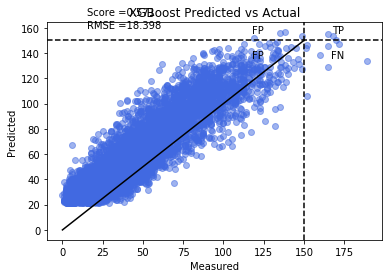

In [426]:
ploter(y_test_16,X_test_16,O3_20_q,model_20_q)

In [442]:
# and later you can load it
model_20_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_20hora_quantile.pkl')

## Modelo Normal

In [432]:
model_20 = XGBRegressor(learning_rate=0.1,n_estimators=200,n_jobs=64,random_state=123)

In [433]:
model_20.fit(X_train_16, y_train_16)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [434]:
O3_20 = model_20.predict(X_test_16)

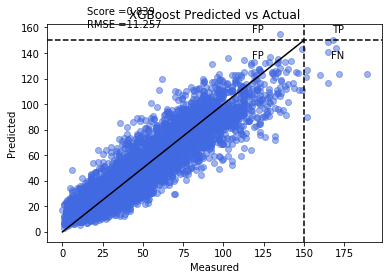

In [435]:
ploter(y_test_16,X_test_16,O3_20,model_20)

In [437]:
# and later you can load it
model_20 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_20hora.pkl')

# HORA 21

In [438]:
hora = 21

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [446]:
lista1 = ['O3forecast_24','O3forecast_23','O3forecast_22','O3forecast_21','O3forecast_20','O3forecast_19',
         'O3forecast_18','O3forecast_17','O3forecast_16','O3forecast_15','O3forecast_14',
         'O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista1 = lista[::-1]
lista1 = lista

In [447]:
dataset_mas = data_hour_merge_14.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset_mas.dropna(inplace=True)

In [448]:
X_16 = dataset_mas.loc[:, dataset_mas.columns != str('O3forecast_'+str(hora))]
y_16 = dataset_mas[str('O3forecast_'+str(hora))]

In [449]:
borrar =["O3forecast_13","O3forecast_14","O3forecast_15","O3forecast_16","O3forecast_17","O3forecast_18",
        "O3forecast_19","O3forecast_19","O3forecast_20"]

In [450]:
X_16.drop(lista1[hora:],axis=1,inplace=True)
if hora != 1:
    X_16.drop(borrar,axis=1,inplace=True)

In [451]:
X_16["O3_forecast_13"] = predictor_mean(model_13_q,model_13,X_16)
X_16["O3_forecast_14"] = predictor_mean(model_14_q,model_14,X_16)
X_16["O3_forecast_15"] = predictor_mean(model_15_q,model_15,X_16)
X_16["O3_forecast_16"] = predictor_mean(model_16_q,model_16,X_16)
X_16["O3_forecast_17"] = predictor_mean(model_17_q,model_17,X_16)
X_16["O3_forecast_18"] = predictor_mean(model_18_q,model_18,X_16)
X_16["O3_forecast_19"] = predictor_mean(model_19_q,model_19,X_16)
X_16["O3_forecast_20"] = predictor_mean(model_20_q,model_20,X_16)

In [452]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split(X_16, y_16, test_size=0.2, random_state=123)

## Quantile 95

In [453]:
model_21_q = GradientBoostingRegressor(n_estimators=50,learning_rate=0.1 
                                       ,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000

In [454]:
model_21_q.fit(X_train_16, y_train_16)

      Iter       Train Loss   Remaining Time 
         1           5.6271           25.08s
         2           5.1879           24.70s
         3           4.8238           24.03s
         4           4.4996           23.05s
         5           4.2236           22.08s
         6           3.9703           21.30s
         7           3.7570           21.14s
         8           3.5740           20.86s
         9           3.4166           20.52s
        10           3.2741           20.23s
        20           2.3893           15.98s
        30           2.0890           11.10s
        40           1.9739            5.49s
        50           1.9261            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, presort='auto',
             random_state=123, subsample=1.0, verbose=1, warm_start=False)

In [455]:
O3_21_q = model_21_q.predict(X_test_16)

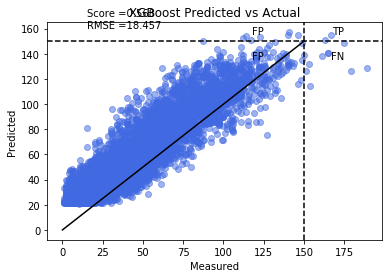

In [456]:
ploter(y_test_16,X_test_16,O3_21_q,model_21_q)

In [458]:
# and later you can load it
O3_21_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_21hora_quantile.pkl')

## Modelo Normal

In [459]:
model_21 = XGBRegressor(learning_rate=0.1,n_estimators=200,n_jobs=64,random_state=123)

In [460]:
model_21.fit(X_train_16, y_train_16)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [461]:
O3_21 = model_21.predict(X_test_16)

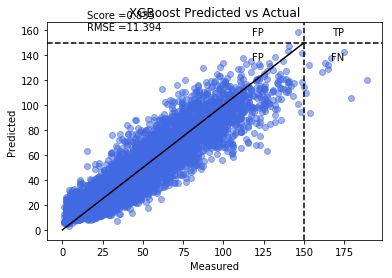

In [462]:
ploter(y_test_16,X_test_16,O3_21,model_21)

In [464]:
# and later you can load it
model_21 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_21hora.pkl')

# HORA 22

In [465]:
hora = 22

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [466]:
lista1 = ['O3forecast_24','O3forecast_23','O3forecast_22','O3forecast_21','O3forecast_20','O3forecast_19',
         'O3forecast_18','O3forecast_17','O3forecast_16','O3forecast_15','O3forecast_14',
         'O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista1 = lista[::-1]
lista1 = lista

In [467]:
dataset_mas = data_hour_merge_14.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset_mas.dropna(inplace=True)

In [468]:
X_16 = dataset_mas.loc[:, dataset_mas.columns != str('O3forecast_'+str(hora))]
y_16 = dataset_mas[str('O3forecast_'+str(hora))]

In [469]:
borrar =["O3forecast_13","O3forecast_14","O3forecast_15","O3forecast_16","O3forecast_17","O3forecast_18",
        "O3forecast_19","O3forecast_19","O3forecast_20","O3forecast_21"]

In [470]:
X_16.drop(lista1[hora:],axis=1,inplace=True)
if hora != 1:
    X_16.drop(borrar,axis=1,inplace=True)

In [471]:
X_16["O3_forecast_13"] = predictor_mean(model_13_q,model_13,X_16)
X_16["O3_forecast_14"] = predictor_mean(model_14_q,model_14,X_16)
X_16["O3_forecast_15"] = predictor_mean(model_15_q,model_15,X_16)
X_16["O3_forecast_16"] = predictor_mean(model_16_q,model_16,X_16)
X_16["O3_forecast_17"] = predictor_mean(model_17_q,model_17,X_16)
X_16["O3_forecast_18"] = predictor_mean(model_18_q,model_18,X_16)
X_16["O3_forecast_19"] = predictor_mean(model_19_q,model_19,X_16)
X_16["O3_forecast_20"] = predictor_mean(model_20_q,model_20,X_16)
X_16["O3_forecast_21"] = predictor_mean(model_21_q,model_21,X_16)

In [472]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split(X_16, y_16, test_size=0.2, random_state=123)

## Quantile 95

In [473]:
model_22_q = GradientBoostingRegressor(n_estimators=50,learning_rate=0.1 
                                       ,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000

In [474]:
model_22_q.fit(X_train_16, y_train_16)

      Iter       Train Loss   Remaining Time 
         1           5.6372           24.99s
         2           5.1978           24.26s
         3           4.8350           22.73s
         4           4.5133           21.81s
         5           4.2362           21.73s
         6           4.0007           21.60s
         7           3.7966           21.42s
         8           3.5962           21.11s
         9           3.4328           20.80s
        10           3.2864           20.45s
        20           2.4082           16.38s
        30           2.0939           11.27s
        40           1.9797            5.56s
        50           1.9352            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, presort='auto',
             random_state=123, subsample=1.0, verbose=1, warm_start=False)

In [475]:
O3_22_q = model_22_q.predict(X_test_16)

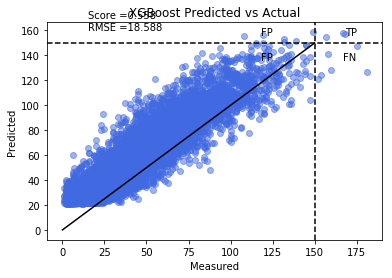

In [476]:
ploter(y_test_16,X_test_16,O3_22_q,model_22_q)

In [479]:
# and later you can load it
O3_22_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_22hora_quantile.pkl')

## Modelo Normal

In [480]:
model_22 = XGBRegressor(learning_rate=0.1,n_estimators=200,n_jobs=64,random_state=123)

In [481]:
model_22.fit(X_train_16, y_train_16)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [482]:
O3_22 = model_22.predict(X_test_16)

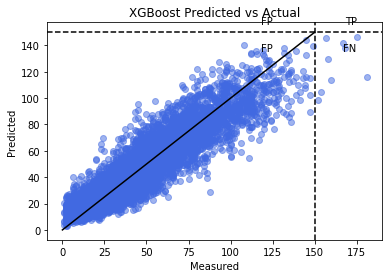

In [483]:
ploter(y_test_16,X_test_16,O3_22,model_22)

In [508]:
# and later you can load it
model_22 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_22hora.pkl')

# HORA 23

In [487]:
hora = 23

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [488]:
lista1 = ['O3forecast_24','O3forecast_23','O3forecast_22','O3forecast_21','O3forecast_20','O3forecast_19',
         'O3forecast_18','O3forecast_17','O3forecast_16','O3forecast_15','O3forecast_14',
         'O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista1 = lista[::-1]
lista1 = lista

In [489]:
dataset_mas = data_hour_merge_14.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset_mas.dropna(inplace=True)

In [490]:
X_16 = dataset_mas.loc[:, dataset_mas.columns != str('O3forecast_'+str(hora))]
y_16 = dataset_mas[str('O3forecast_'+str(hora))]

In [491]:
borrar =["O3forecast_13","O3forecast_14","O3forecast_15","O3forecast_16","O3forecast_17","O3forecast_18",
        "O3forecast_19","O3forecast_19","O3forecast_20","O3forecast_21","O3forecast_22"]

In [492]:
X_16.drop(lista1[hora:],axis=1,inplace=True)
if hora != 1:
    X_16.drop(borrar,axis=1,inplace=True)

In [493]:
X_16["O3_forecast_13"] = predictor_mean(model_13_q,model_13,X_16)
X_16["O3_forecast_14"] = predictor_mean(model_14_q,model_14,X_16)
X_16["O3_forecast_15"] = predictor_mean(model_15_q,model_15,X_16)
X_16["O3_forecast_16"] = predictor_mean(model_16_q,model_16,X_16)
X_16["O3_forecast_17"] = predictor_mean(model_17_q,model_17,X_16)
X_16["O3_forecast_18"] = predictor_mean(model_18_q,model_18,X_16)
X_16["O3_forecast_19"] = predictor_mean(model_19_q,model_19,X_16)
X_16["O3_forecast_20"] = predictor_mean(model_20_q,model_20,X_16)
X_16["O3_forecast_21"] = predictor_mean(model_21_q,model_21,X_16)
X_16["O3_forecast_22"] = predictor_mean(model_22_q,model_22,X_16)

In [494]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split(X_16, y_16, test_size=0.2, random_state=123)

## Quantile 95

In [495]:
model_23_q = GradientBoostingRegressor(n_estimators=50,learning_rate=0.1 
                                       ,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000

In [496]:
model_23_q.fit(X_train_16, y_train_16)

      Iter       Train Loss   Remaining Time 
         1           5.6578           23.98s
         2           5.2197           24.14s
         3           4.8464           23.53s
         4           4.5192           23.22s
         5           4.2505           22.86s
         6           4.0148           22.57s
         7           3.8008           22.15s
         8           3.6145           21.76s
         9           3.4343           21.34s
        10           3.2889           20.94s
        20           2.4251           16.15s
        30           2.1285           11.00s
        40           2.0193            5.52s
        50           1.9776            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, presort='auto',
             random_state=123, subsample=1.0, verbose=1, warm_start=False)

In [497]:
O3_23_q = model_23_q.predict(X_test_16)

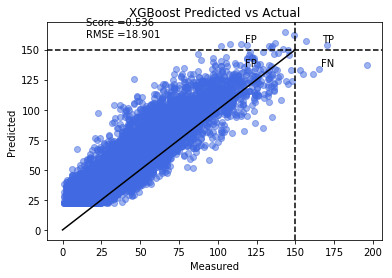

In [498]:
ploter(y_test_16,X_test_16,O3_23_q,model_23_q)

In [501]:
# and later you can load it
O3_23_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_23hora_quantile.pkl')

## Modelo Normal

In [502]:
model_23 = XGBRegressor(learning_rate=0.1,n_estimators=200,n_jobs=64,random_state=123)

In [503]:
model_23.fit(X_train_16, y_train_16)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [504]:
O3_23 = model_23.predict(X_test_16)

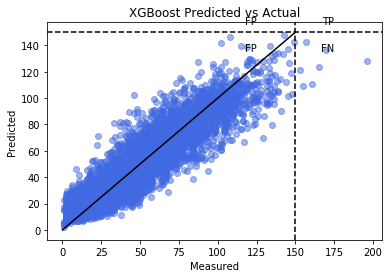

In [505]:
ploter(y_test_16,X_test_16,O3_23,model_23)

In [507]:
# and later you can load it
model_23 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_23hora.pkl')

# HORA 24

In [679]:
hora = 24

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [680]:
lista1 = ['O3forecast_24','O3forecast_23','O3forecast_22','O3forecast_21','O3forecast_20','O3forecast_19',
         'O3forecast_18','O3forecast_17','O3forecast_16','O3forecast_15','O3forecast_14',
         'O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista1 = lista[::-1]
lista1 = lista

In [681]:
dataset_mas = data_hour_merge_14.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset_mas.dropna(inplace=True)

In [682]:
X_16 = dataset_mas.loc[:, dataset_mas.columns != str('O3forecast_'+str(hora))]
y_16 = dataset_mas[str('O3forecast_'+str(hora))]

In [683]:
borrar =["O3forecast_13","O3forecast_14","O3forecast_15","O3forecast_16","O3forecast_17","O3forecast_18",
        "O3forecast_19","O3forecast_19","O3forecast_20","O3forecast_21","O3forecast_22","O3forecast_23"]

In [684]:
X_16.drop(lista1[hora:],axis=1,inplace=True)
if hora != 1:
    X_16.drop(borrar,axis=1,inplace=True)

In [685]:
X_16["O3_forecast_13"] = predictor_mean(model_13_q,model_13,X_16)
X_16["O3_forecast_14"] = predictor_mean(model_14_q,model_14,X_16)
X_16["O3_forecast_15"] = predictor_mean(model_15_q,model_15,X_16)
X_16["O3_forecast_16"] = predictor_mean(model_16_q,model_16,X_16)
X_16["O3_forecast_17"] = predictor_mean(model_17_q,model_17,X_16)
X_16["O3_forecast_18"] = predictor_mean(model_18_q,model_18,X_16)
X_16["O3_forecast_19"] = predictor_mean(model_19_q,model_19,X_16)
X_16["O3_forecast_20"] = predictor_mean(model_20_q,model_20,X_16)
X_16["O3_forecast_21"] = predictor_mean(model_21_q,model_21,X_16)
X_16["O3_forecast_22"] = predictor_mean(model_22_q,model_22,X_16)
X_16["O3_forecast_23"] = predictor_mean(model_23_q,model_23,X_16)

In [521]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split(X_16, y_16, test_size=0.2, random_state=123)

## Quantile 95

In [545]:
model_24_q = GradientBoostingRegressor(n_estimators=50,learning_rate=0.1 
                                       ,loss="quantile",alpha=0.95,verbose=1,random_state=123)#,n_estimators=1000

In [546]:
model_24_q.fit(X_train_16, y_train_16)

      Iter       Train Loss   Remaining Time 
         1           3.4164           22.08s
         2           3.1980           22.49s
         3           2.9982           22.44s
         4           2.8296           22.33s
         5           2.6818           21.91s
         6           2.5321           21.73s
         7           2.3968           21.51s
         8           2.2896           21.22s
         9           2.1924           20.75s
        10           2.1014           20.37s
        20           1.5708           16.11s
        30           1.3704           10.90s
        40           1.2896            5.35s
        50           1.2507            0.00s


GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, presort='auto',
             random_state=123, subsample=1.0, verbose=1, warm_start=False)

In [547]:
O3_24_q = model_24_q.predict(X_test_16)

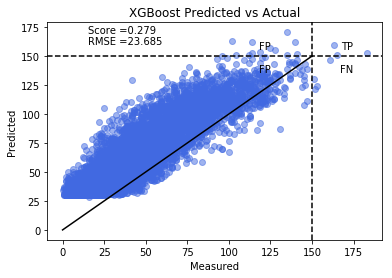

In [548]:
ploter(y_test_16,X_test_16,O3_24_q,model_24_q)

In [550]:
# and later you can load it
O3_24_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_24hora_quantile.pkl')

## Modelo Normal

In [551]:
model_24 = XGBRegressor(learning_rate=0.1,n_estimators=200,n_jobs=64,random_state=123)

In [552]:
model_24.fit(X_train_16, y_train_16)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [553]:
O3_24 = model_24.predict(X_test_16)

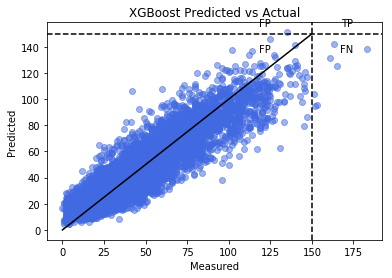

In [554]:
ploter(y_test_16,X_test_16,O3_24,model_24)

In [556]:
# now you can save it to a file
joblib.dump(model_24,'/home/paw/DanielBustillos/Notebooks/Modelos/O3_24hora.pkl') 

['/home/paw/DanielBustillos/Notebooks/Modelos/O3_24hora.pkl']

In [557]:
# and later you can load it
model_24 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_24hora.pkl')